In [1]:
# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# LOADING THE DATASET
import gdown

# Convert to a direct download link (Excel format)
download_url = "https://docs.google.com/spreadsheets/d/1tjx2ifyUsAAB-yxxuvTIjXNmkomA9OzW/export?format=xlsx"

# Output filename
output_file = "downloaded_file.xlsx"

# Download the file
gdown.download(download_url, output=output_file, quiet=False)

# === Step 2: Read Excel File ===
data = pd.read_excel(output_file)

# Display the first few rows
print(data.head())


# Create a copy of the data
df = data.copy()

# Display column names
df.columns
df

Downloading...
From: https://docs.google.com/spreadsheets/d/1tjx2ifyUsAAB-yxxuvTIjXNmkomA9OzW/export?format=xlsx
To: /content/downloaded_file.xlsx
16.9kB [00:00, 30.6MB/s]


   Year  Month  Day  Inflation
0  2000      1   31   0.329139
1  2000      2   28   1.940367
2  2000      3   31   4.469678
3  2000      4   30   3.672022
4  2000      5   31   2.382412


Year  Month  Day  Inflation
0    2000      1   31   0.329139
1    2000      2   28   1.940367
2    2000      3   31   4.469678
3    2000      4   30   3.672022
4    2000      5   31   2.382412
..    ...    ...  ...        ...
298  2024     11   30  -2.068252
299  2024     12   31  -1.742696
300  2025      1   31  -4.035874
301  2025      2   28  -4.187438
302  2025      3   31  -2.592781

[303 rows x 4 columns]

In [2]:
df.columns
# Create a new 'Date' column by combining 'Year', 'Month', and 'Day'
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Set 'Date' as the index
df.set_index('Date', inplace=True)
# Drop the 'Year', 'Month', and 'Day' columns
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)

            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412
DatetimeIndex(['2000-01-31', '2000-02-28', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=303, freq=None)


In [3]:
df

Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412
...               ...
2024-11-30  -2.068252
2024-12-31  -1.742696
2025-01-31  -4.035874
2025-02-28  -4.187438
2025-03-31  -2.592781

[303 rows x 1 columns]

In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming your time series data is in 'df' and it's in a column called 'value'
# Splitting the data into 70% for training and 30% for testing
train_size = int(len(df) * 0.7)
train, test = df[:train_size], df[train_size:]

# Inspect the first few rows of training and testing sets
print(train.head(), test.head())


            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412             Inflation
Date                 
2017-09-30   7.066190
2017-10-31   7.760928
2017-11-30   7.570423
2017-12-31   7.149085
2018-01-31   5.770887


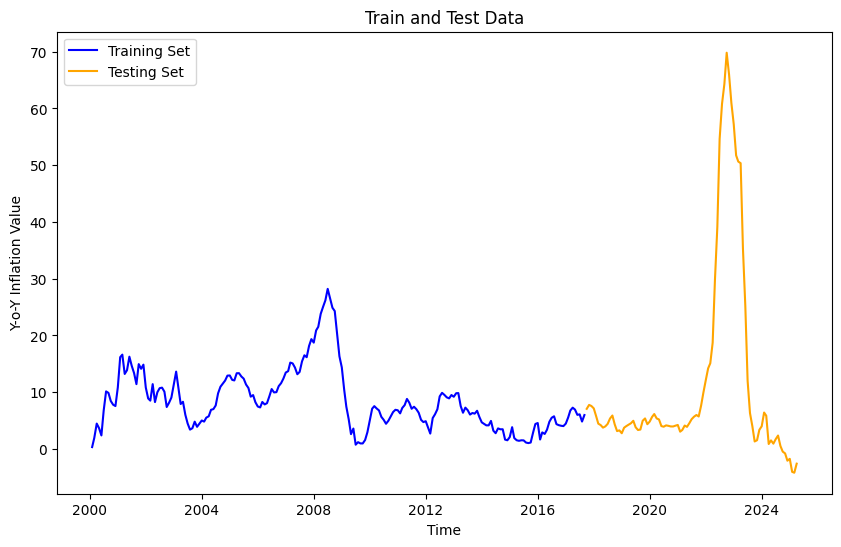

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



# Plotting the train and test sets
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Set', color='blue')
plt.plot(test, label='Testing Set', color='orange')
plt.title('Train and Test Data')
plt.xlabel('Time')
plt.ylabel('Y-o-Y Inflation Value')
plt.legend()
plt.show()


In [6]:
df.columns

Index(['Inflation'], dtype='object')

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming 'df' contains the inflation data in a column named 'Inflation'

# Step 1: Create lag features
max_lag = 12  # Maximum number of lags
for lag in range(1, max_lag + 1):
    df[f'Inflation_Lag_{lag}'] = df['Inflation'].shift(lag)

# Drop NaN values caused by shifting (we can't use rows with missing lag values)
df = df.dropna()

# Step 2: Split the data into train and test sets
train_size = int(0.7 * len(df))
train = df[:train_size]
test = df[train_size:]

# Define dependent variable y (current inflation)
y_train = train['Inflation']
y_test = test['Inflation']

# Define exogenous variables X (past 12 lags of inflation)
X_train = train[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]
X_test = test[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]


In [8]:
X_test

Inflation_Lag_1  Inflation_Lag_2  Inflation_Lag_3  \
Date                                                            
2017-12-31         7.570423         7.760928         7.066190   
2018-01-31         7.149085         7.570423         7.760928   
2018-02-28         5.770887         7.149085         7.570423   
2018-03-31         4.455870         5.770887         7.149085   
2018-04-30         4.206009         4.455870         5.770887   
...                     ...              ...              ...   
2024-11-30        -0.783699        -0.469239         0.526039   
2024-12-31        -2.068252        -0.783699        -0.469239   
2025-01-31        -1.742696        -2.068252        -0.783699   
2025-02-28        -4.035874        -1.742696        -2.068252   
2025-03-31        -4.187438        -4.035874        -1.742696   

            Inflation_Lag_4  Inflation_Lag_5  Inflation_Lag_6  \
Date                                                            
2017-12-31         5.976806         4.828797         6.095406   
2018-01-31         7.066190         5.976806         4.828797   
2018-02-28         7.760928         7.066190         5.976806   
2018-03-31         7.570423         7.760928         7.066190   
2018-04-30         7.149085         7.570423         7.760928   
...                     ...              ...              ...   
2024-11-30         2.365931         1.716069         0.936037   
2024-12-31         0.526039         2.365931         1.716069   
2025-01-31        -0.469239         0.526039         2.365931   
2025-02-28        -0.783699        -0.469239         0.526039   
2025-03-31        -2.068252        -0.783699        -0.469239   

            Inflation_Lag_7  Inflation_Lag_8  Inflation_Lag_9  \
Date                                                            
2017-12-31         6.008969         6.940639         7.274401   
2018-01-31         6.095406         6.008969         6.940639   
2018-02-28         4.828797         6.095406         6.008969   
2018-03-31         5.976806         4.828797         6.095406   
2018-04-30         7.066190         5.976806         4.828797   
...                     ...              ...              ...   
2024-11-30         1.508060         0.871795         5.857520   
2024-12-31         0.936037         1.508060         0.871795   
2025-01-31         1.716069         0.936037         1.508060   
2025-02-28         2.365931         1.716069         0.936037   
2025-03-31         0.526039         2.365931         1.716069   

            Inflation_Lag_10  Inflation_Lag_11  Inflation_Lag_12  
Date                                                              
2017-12-31          6.770357          5.545455          4.462659  
2018-01-31          7.274401          6.770357          5.545455  
2018-02-28          6.940639          7.274401          6.770357  
2018-03-31          6.008969          6.940639          7.274401  
2018-04-30          6.095406          6.008969          6.940639  
...                      ...               ...               ...  
2024-11-30          6.415695          3.997868          3.367183  
2024-12-31          5.857520          6.415695          3.997868  
2025-01-31          0.871795          5.857520          6.415695  
2025-02-28          1.508060          0.871795          5.857520  
2025-03-31          0.936037          1.508060          0.871795  

[88 rows x 12 columns]

Mean Squared Error (MSE): 140.78699129811403
Root Mean Squared Error (RMSE): 11.865369412627405
Mean Absolute Error (MAE): 5.437475474813701
Mean Absolute Percentage Error (MAPE): 56.84494027443484%
R-squared: 0.5773407801380072


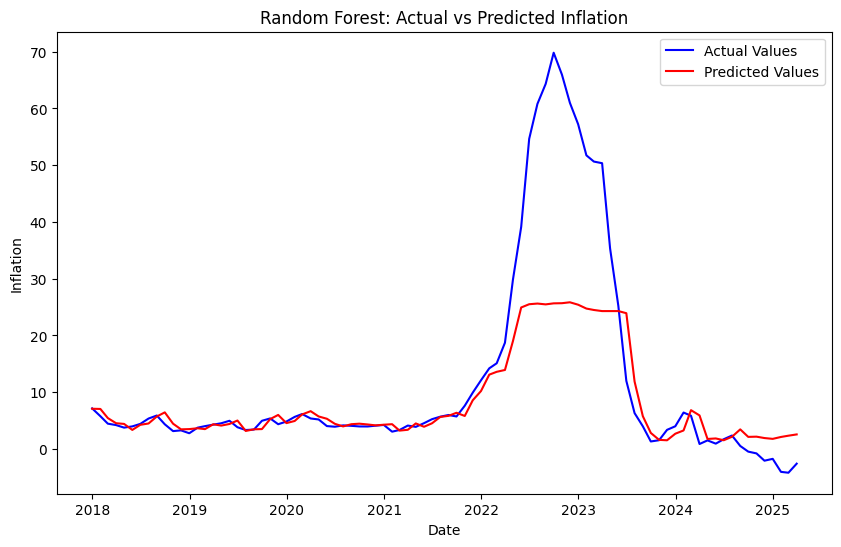

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE is percentage error
r2 = r2_score(y_test, y_pred)  # R-squared

# Print all metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R-squared: {r2}")

# Step 5: Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual Values", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Values", color='red')
plt.title("Random Forest: Actual vs Predicted Inflation")
plt.xlabel("Date")
plt.ylabel("Inflation")
plt.legend()
plt.show()

In [10]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 16.6 MB/s eta 0:00:00


[I 2025-05-29 03:55:31,600] A new study created in memory with name: no-name-ff3023e6-edba-4f05-86ac-48a53a4405f1
[I 2025-05-29 03:55:38,330] Trial 0 finished with value: 2.7679299962818753 and parameters: {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 2.7679299962818753.
[I 2025-05-29 03:55:43,777] Trial 1 finished with value: 2.7111005029528306 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 1 with value: 2.7111005029528306.
[I 2025-05-29 03:55:46,086] Trial 2 finished with value: 2.7454419961527234 and parameters: {'n_estimators': 100, 'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 1 with value: 2.7111005029528306.
[I 2025-05-29 03:55:52,959] Trial 3 finished with value: 2.7489480096095233 and parameters: {'n_estimators': 250, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 1 with valu

Best Hyperparameters: {'n_estimators': 200, 'max_depth': 50, 'min_samples_split': 7, 'min_samples_leaf': 5}
Mean Squared Error (MSE): 157.12015647537726
Root Mean Squared Error (RMSE): 12.534757934454788
Mean Absolute Error (MAE): 5.666598996748105
Mean Absolute Percentage Error (MAPE): 55.362160916845305%
R-squared: 0.5283066841036557


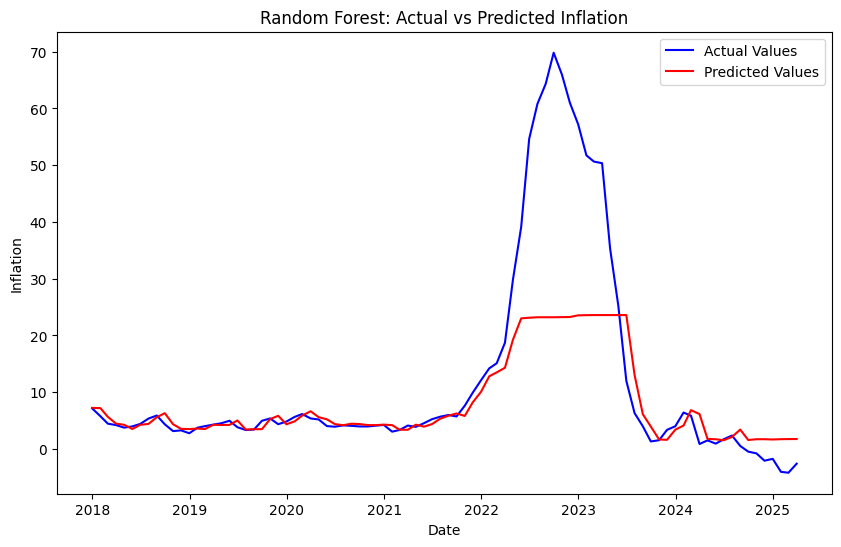

In [11]:
import pandas as pd
import numpy as np
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

# Define TimeSeries Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Define objective function for Optuna
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300, step=50)
    max_depth = trial.suggest_int("max_depth", 5, 50, step=5)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)

    # Initialize model
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Perform cross-validation
    rmse_scores = []
    for train_idx, val_idx in tscv.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        rf_model.fit(X_train_fold, y_train_fold)
        y_pred_fold = rf_model.predict(X_val_fold)
        rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_pred_fold)))

    return np.mean(rmse_scores)

# Run Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)  # Adjust n_trials based on computation power

# Print best hyperparameters
best_params = study.best_params
print(f"Best Hyperparameters: {best_params}")

# Train final model using best parameters
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_best.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R-squared: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual Values", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Values", color='red')
plt.title("Random Forest: Actual vs Predicted Inflation")
plt.xlabel("Date")
plt.ylabel("Inflation")
plt.legend()
plt.show()


## Random FOrest With DIfferent Lagged Features

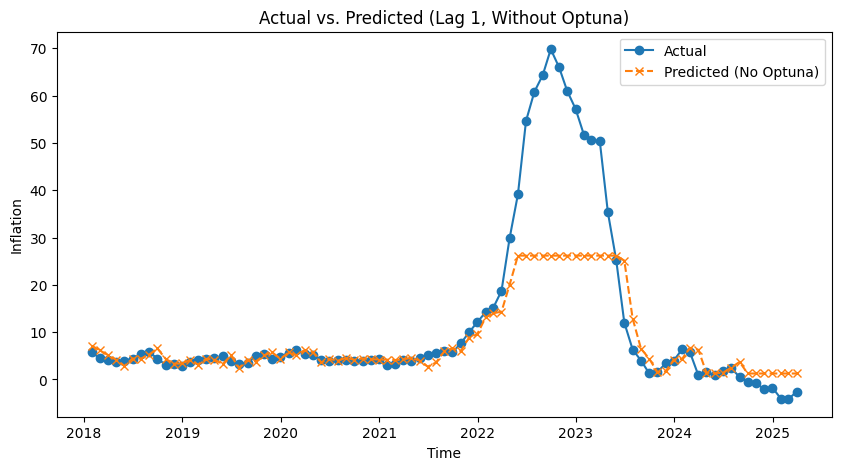

[I 2025-05-29 03:56:23,421] A new study created in memory with name: no-name-7f2d9104-c401-4798-aa0d-3114389d18ae
[I 2025-05-29 03:56:23,907] Trial 0 finished with value: 2.0303197022675135 and parameters: {'n_estimators': 50, 'max_depth': 40, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 0 with value: 2.0303197022675135.
[I 2025-05-29 03:56:24,377] Trial 1 finished with value: 2.023658385610338 and parameters: {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 1 with value: 2.023658385610338.
[I 2025-05-29 03:56:26,495] Trial 2 finished with value: 2.0355998321986806 and parameters: {'n_estimators': 150, 'max_depth': 50, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 1 with value: 2.023658385610338.
[I 2025-05-29 03:56:31,120] Trial 3 finished with value: 2.033645165821616 and parameters: {'n_estimators': 200, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 1 with value: 2.02

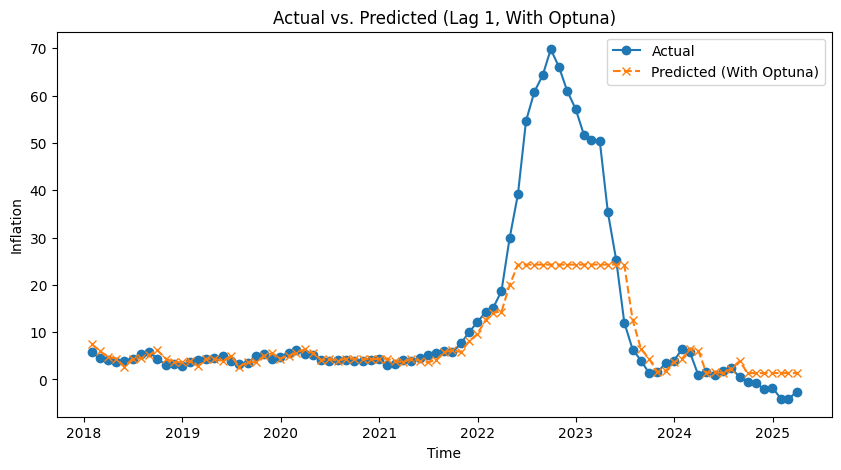

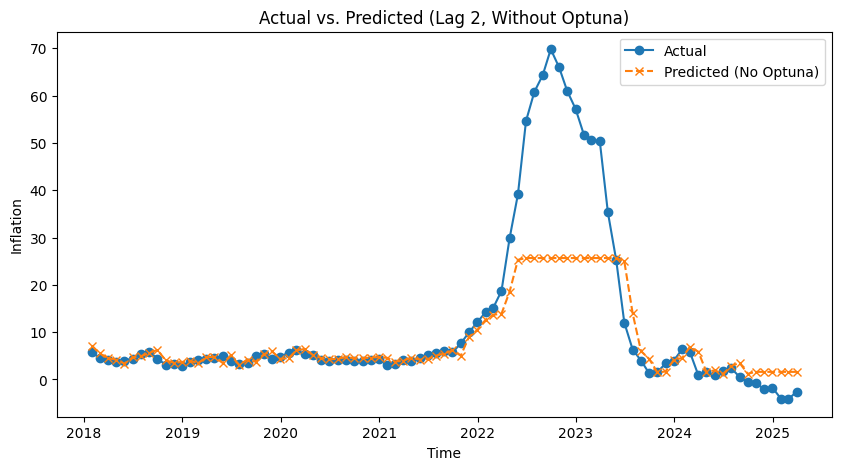

[I 2025-05-29 03:57:11,340] A new study created in memory with name: no-name-7b482b02-a5ec-4852-9495-b81893dc08d7
[I 2025-05-29 03:57:13,084] Trial 0 finished with value: 2.1447788989404395 and parameters: {'n_estimators': 250, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 0 with value: 2.1447788989404395.
[I 2025-05-29 03:57:13,448] Trial 1 finished with value: 2.1499002851361766 and parameters: {'n_estimators': 50, 'max_depth': 45, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 0 with value: 2.1447788989404395.
[I 2025-05-29 03:57:15,202] Trial 2 finished with value: 2.259312604562163 and parameters: {'n_estimators': 250, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 0 with value: 2.1447788989404395.
[I 2025-05-29 03:57:17,309] Trial 3 finished with value: 2.1766424101604627 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 

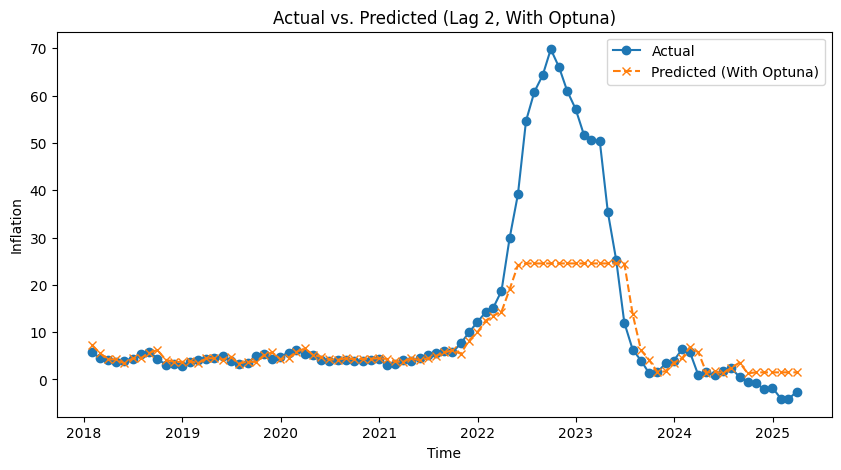

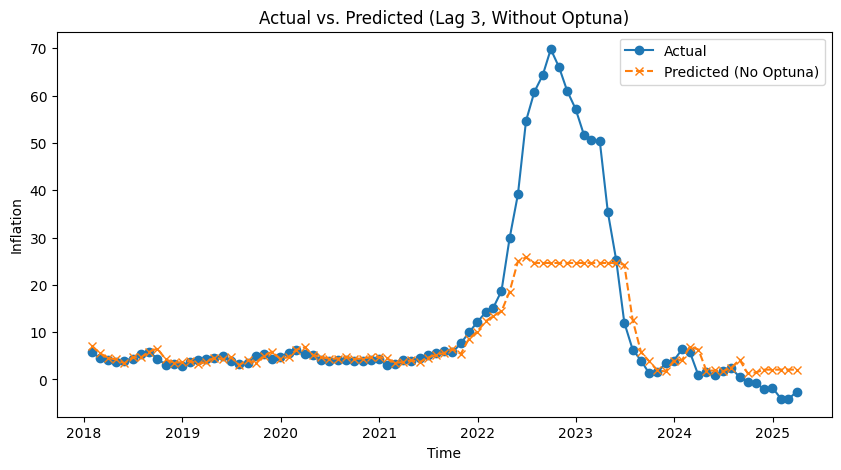

[I 2025-05-29 03:57:42,150] A new study created in memory with name: no-name-4a20ba7a-ece3-42be-b587-626e5eafc60e
[I 2025-05-29 03:57:43,889] Trial 0 finished with value: 2.0696985300423942 and parameters: {'n_estimators': 200, 'max_depth': 45, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 0 with value: 2.0696985300423942.
[I 2025-05-29 03:57:46,050] Trial 1 finished with value: 2.131132995480608 and parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 2.0696985300423942.
[I 2025-05-29 03:57:46,435] Trial 2 finished with value: 2.182783367948095 and parameters: {'n_estimators': 50, 'max_depth': 45, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 2.0696985300423942.
[I 2025-05-29 03:57:47,191] Trial 3 finished with value: 2.189407713373968 and parameters: {'n_estimators': 100, 'max_depth': 35, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 0 with value: 2.

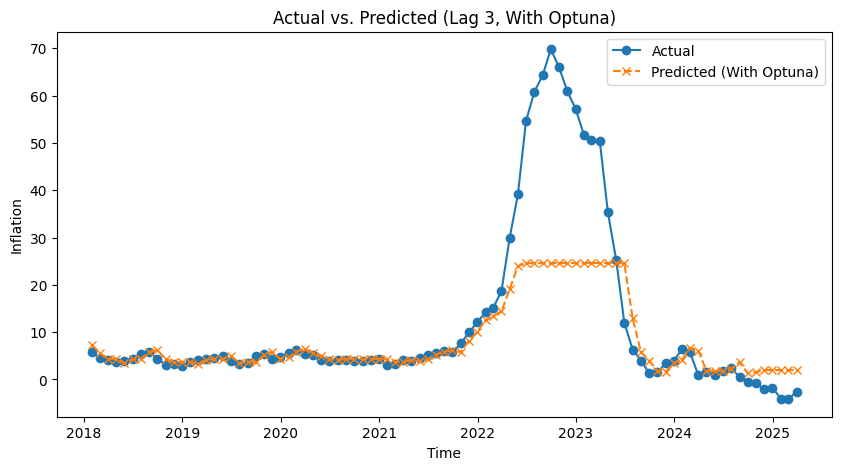

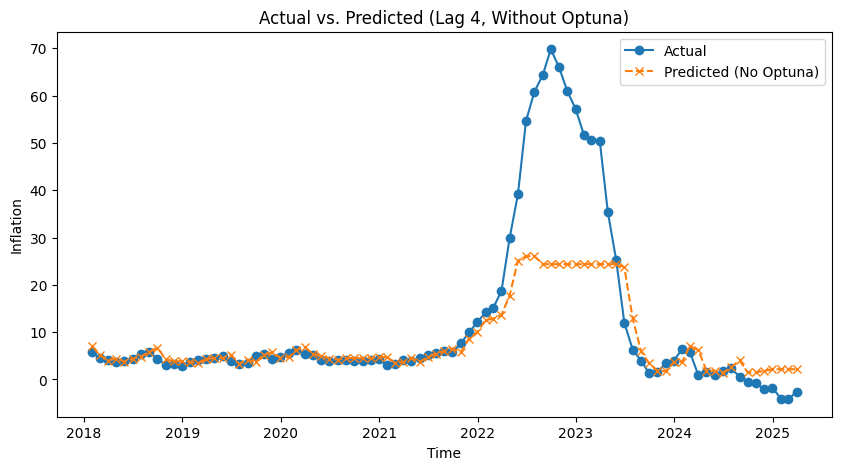

[I 2025-05-29 03:58:16,573] A new study created in memory with name: no-name-6831e32f-c6a8-4114-9988-d77ad462e414
[I 2025-05-29 03:58:18,796] Trial 0 finished with value: 2.1061128184050193 and parameters: {'n_estimators': 250, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 0 with value: 2.1061128184050193.
[I 2025-05-29 03:58:19,172] Trial 1 finished with value: 2.179713376775248 and parameters: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 2.1061128184050193.
[I 2025-05-29 03:58:20,707] Trial 2 finished with value: 2.161527000970934 and parameters: {'n_estimators': 200, 'max_depth': 35, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 0 with value: 2.1061128184050193.
[I 2025-05-29 03:58:23,173] Trial 3 finished with value: 2.1365415048866536 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 0 with value: 2

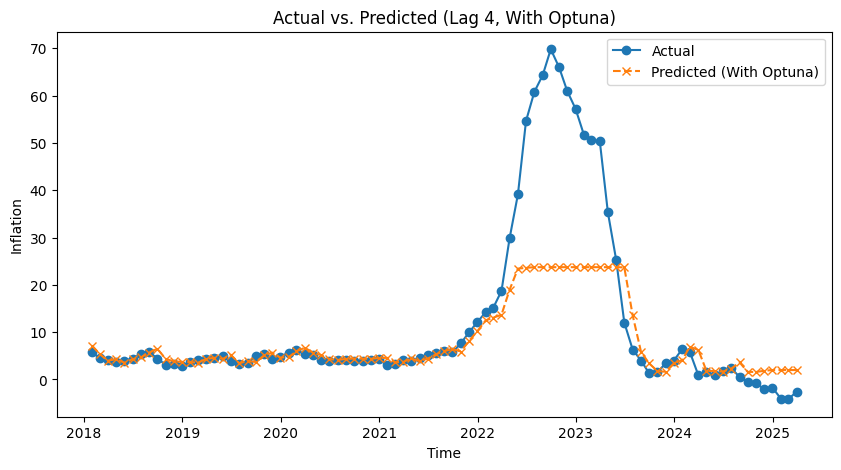

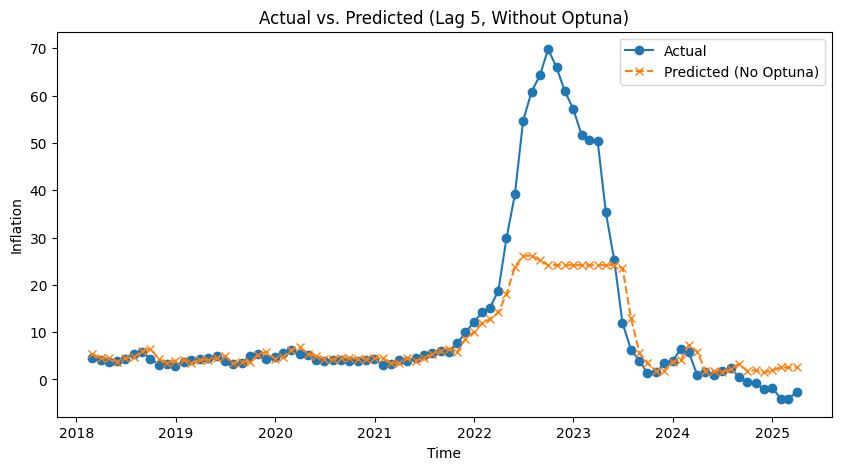

[I 2025-05-29 03:58:45,975] A new study created in memory with name: no-name-83c5dabb-dc9e-4436-a219-4f6c3e81011a
[I 2025-05-29 03:58:47,447] Trial 0 finished with value: 2.2102792614783526 and parameters: {'n_estimators': 200, 'max_depth': 40, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 0 with value: 2.2102792614783526.
[I 2025-05-29 03:58:49,741] Trial 1 finished with value: 2.206845847002159 and parameters: {'n_estimators': 200, 'max_depth': 25, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 1 with value: 2.206845847002159.
[I 2025-05-29 03:58:50,789] Trial 2 finished with value: 2.197822676094307 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 2 with value: 2.197822676094307.
[I 2025-05-29 03:58:51,180] Trial 3 finished with value: 2.1890792580699223 and parameters: {'n_estimators': 50, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 3 with value: 2.

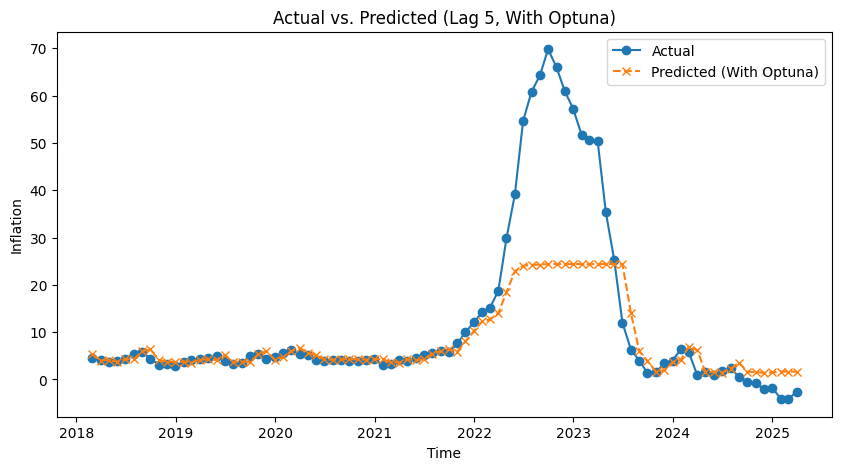

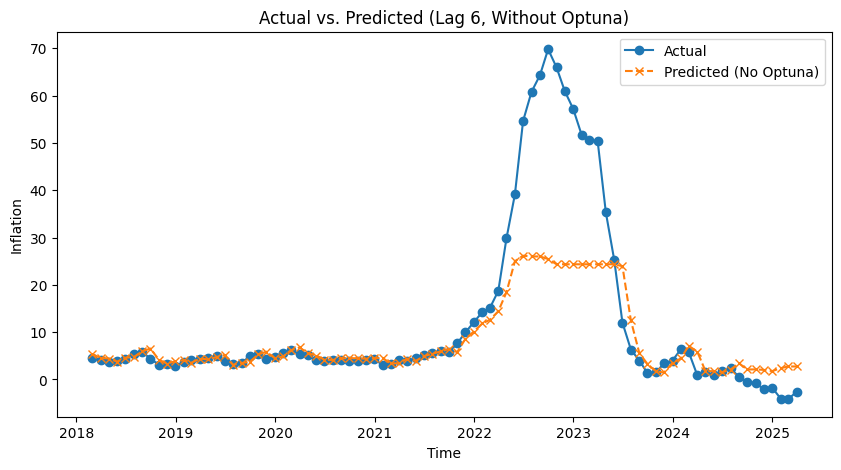

[I 2025-05-29 03:59:08,996] A new study created in memory with name: no-name-69fffbc2-385e-49ea-9444-f9bcb20650a4
[I 2025-05-29 03:59:10,166] Trial 0 finished with value: 2.254698045179728 and parameters: {'n_estimators': 150, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 0 with value: 2.254698045179728.
[I 2025-05-29 03:59:10,566] Trial 1 finished with value: 2.2628859531454086 and parameters: {'n_estimators': 50, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 2.254698045179728.
[I 2025-05-29 03:59:12,483] Trial 2 finished with value: 2.256104260056358 and parameters: {'n_estimators': 250, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 0 with value: 2.254698045179728.
[I 2025-05-29 03:59:15,035] Trial 3 finished with value: 2.2429188849527657 and parameters: {'n_estimators': 250, 'max_depth': 40, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 3 with value: 2.2

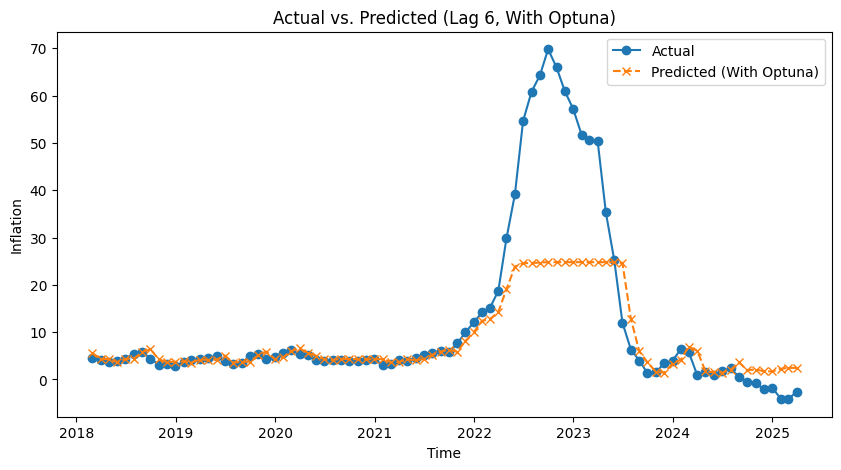

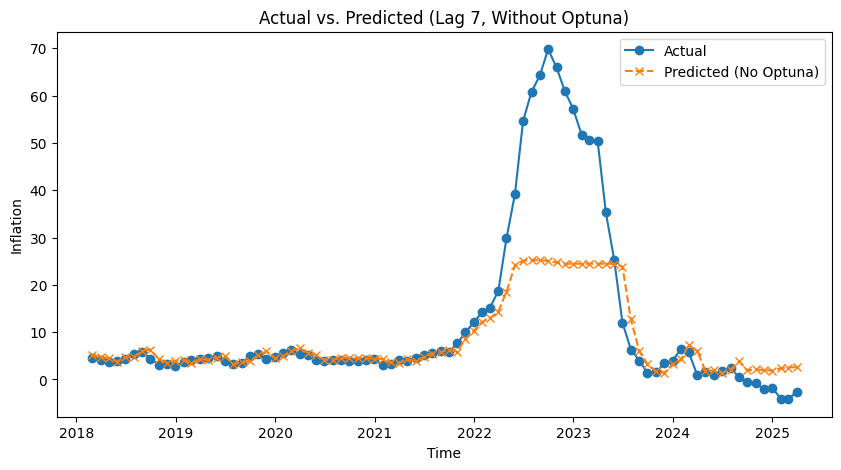

[I 2025-05-29 03:59:37,931] A new study created in memory with name: no-name-67039866-974f-4860-a140-11e25a10ec67
[I 2025-05-29 03:59:38,348] Trial 0 finished with value: 2.380399873939017 and parameters: {'n_estimators': 50, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 2.380399873939017.
[I 2025-05-29 03:59:39,383] Trial 1 finished with value: 2.3751512545978746 and parameters: {'n_estimators': 100, 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 1 with value: 2.3751512545978746.
[I 2025-05-29 03:59:40,662] Trial 2 finished with value: 2.376531224990227 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 1 with value: 2.3751512545978746.
[I 2025-05-29 03:59:43,235] Trial 3 finished with value: 2.3609398677150923 and parameters: {'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 3 with value: 2

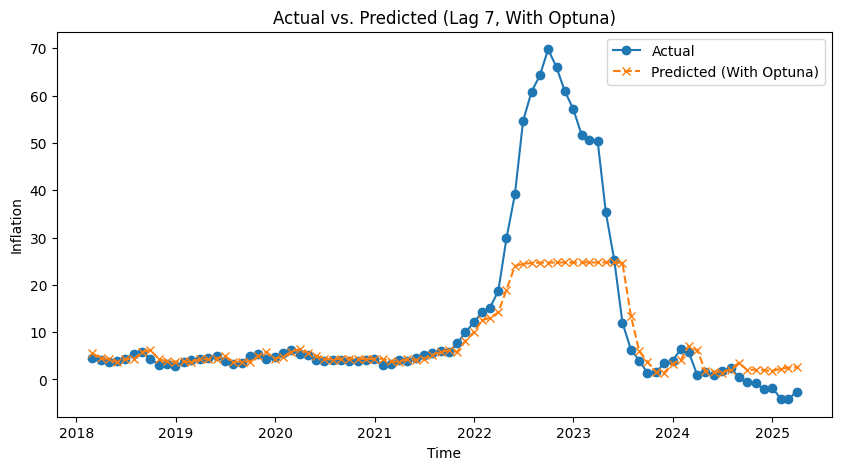

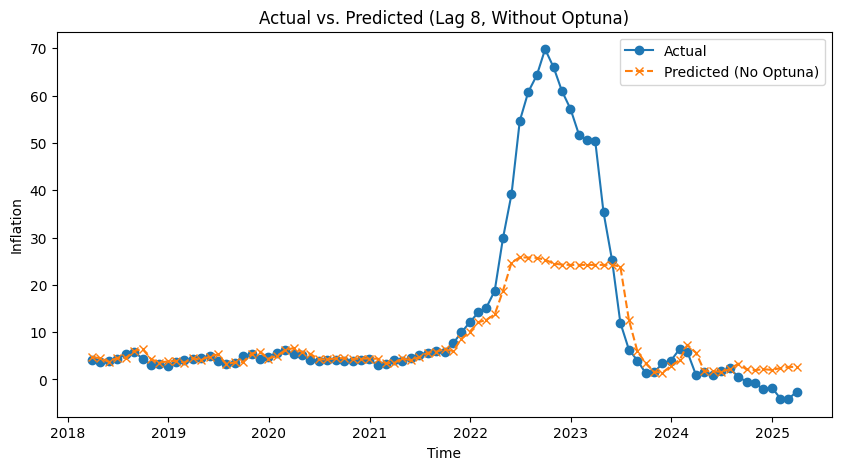

[I 2025-05-29 04:00:15,302] A new study created in memory with name: no-name-d74f7f3f-b93b-44e3-a758-18a1c7cee55a
[I 2025-05-29 04:00:18,487] Trial 0 finished with value: 2.3424016384598714 and parameters: {'n_estimators': 300, 'max_depth': 25, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 0 with value: 2.3424016384598714.
[I 2025-05-29 04:00:21,941] Trial 1 finished with value: 2.2976181839315344 and parameters: {'n_estimators': 250, 'max_depth': 25, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 1 with value: 2.2976181839315344.
[I 2025-05-29 04:00:23,407] Trial 2 finished with value: 2.3413023549344585 and parameters: {'n_estimators': 150, 'max_depth': 25, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 1 with value: 2.2976181839315344.
[I 2025-05-29 04:00:25,371] Trial 3 finished with value: 2.3947137652050174 and parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 1 with val

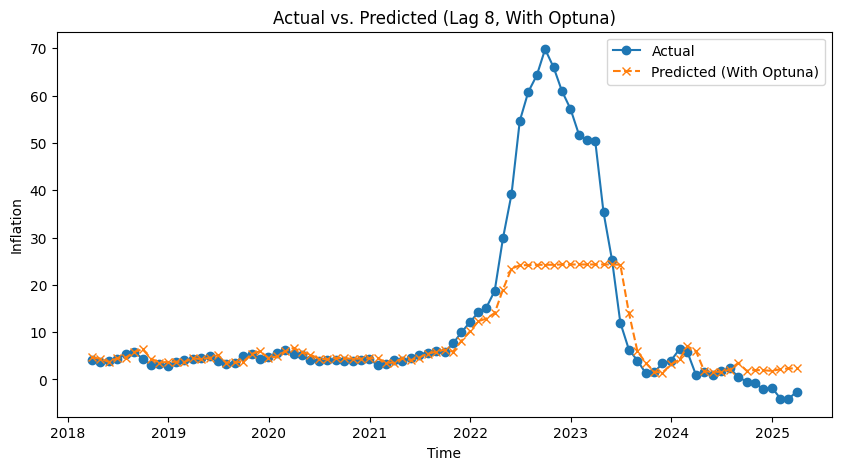

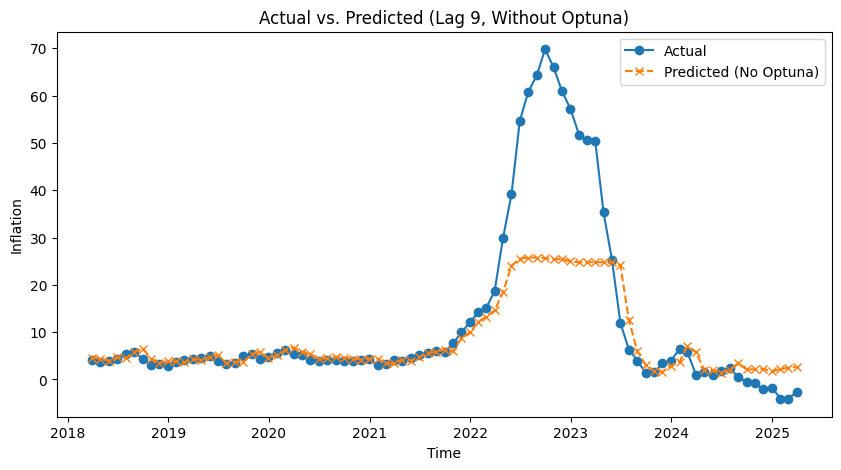

[I 2025-05-29 04:00:56,192] A new study created in memory with name: no-name-6fe1297b-4b16-4019-987f-1456b70c5b2d
[I 2025-05-29 04:00:58,342] Trial 0 finished with value: 2.501488049574588 and parameters: {'n_estimators': 200, 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 0 with value: 2.501488049574588.
[I 2025-05-29 04:01:00,972] Trial 1 finished with value: 2.575313213920203 and parameters: {'n_estimators': 250, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 0 with value: 2.501488049574588.
[I 2025-05-29 04:01:01,440] Trial 2 finished with value: 2.5100759246267423 and parameters: {'n_estimators': 50, 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 2.501488049574588.
[I 2025-05-29 04:01:01,925] Trial 3 finished with value: 2.507666872432567 and parameters: {'n_estimators': 50, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 0 with value: 2.501

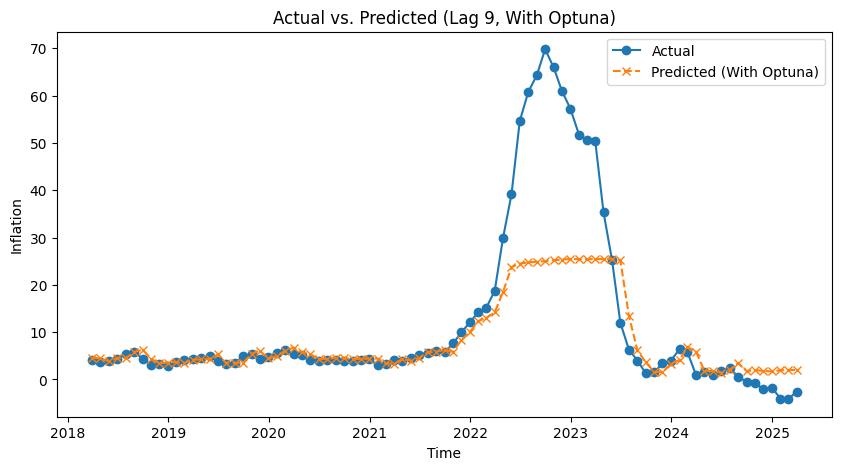

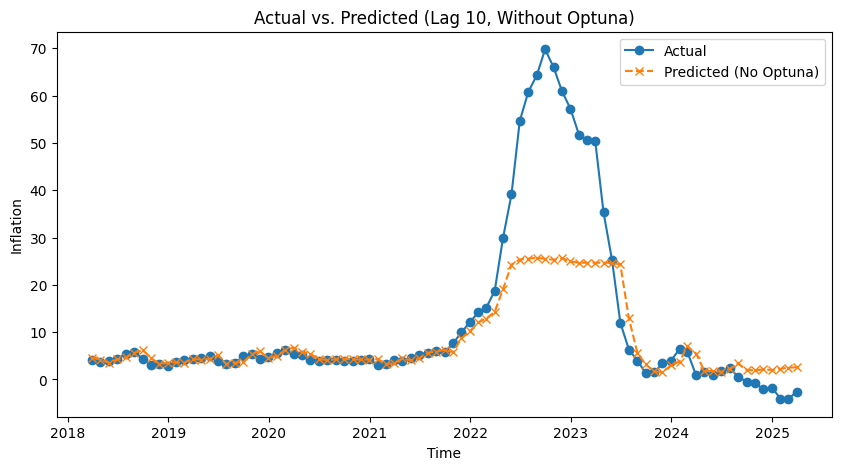

[I 2025-05-29 04:01:35,798] A new study created in memory with name: no-name-2ad00029-695e-42ae-8ed5-daac00fad345
[I 2025-05-29 04:01:37,414] Trial 0 finished with value: 2.6250820268341037 and parameters: {'n_estimators': 150, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 0 with value: 2.6250820268341037.
[I 2025-05-29 04:01:40,067] Trial 1 finished with value: 2.5743417241056266 and parameters: {'n_estimators': 250, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 1 with value: 2.5743417241056266.
[I 2025-05-29 04:01:42,153] Trial 2 finished with value: 2.6126963570130135 and parameters: {'n_estimators': 250, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 1 with value: 2.5743417241056266.
[I 2025-05-29 04:01:42,969] Trial 3 finished with value: 2.545999541924384 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 3 with value: 

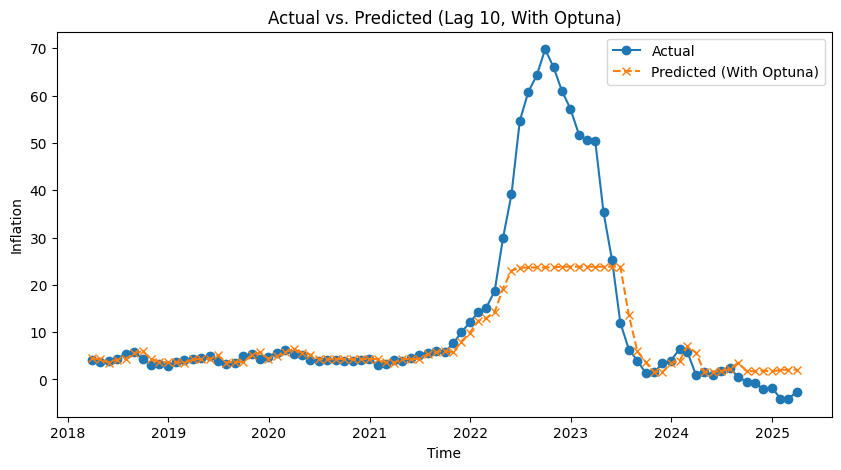

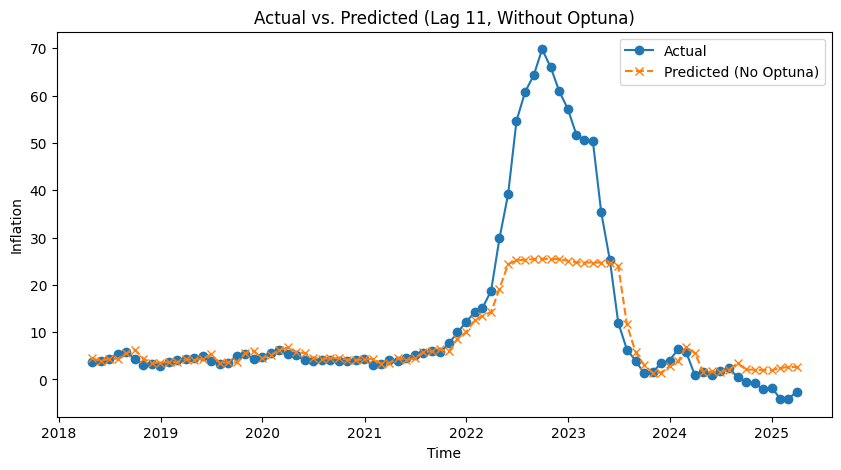

[I 2025-05-29 04:02:02,211] A new study created in memory with name: no-name-ba2a1f21-38c0-48c7-bef8-d087128d1ffe
[I 2025-05-29 04:02:05,276] Trial 0 finished with value: 2.923171237531972 and parameters: {'n_estimators': 250, 'max_depth': 35, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 0 with value: 2.923171237531972.
[I 2025-05-29 04:02:07,773] Trial 1 finished with value: 2.908149515594272 and parameters: {'n_estimators': 300, 'max_depth': 45, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 1 with value: 2.908149515594272.
[I 2025-05-29 04:02:08,617] Trial 2 finished with value: 2.9094098704868387 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 1 with value: 2.908149515594272.
[I 2025-05-29 04:02:09,457] Trial 3 finished with value: 2.8161771662396577 and parameters: {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 3 with value: 2.8

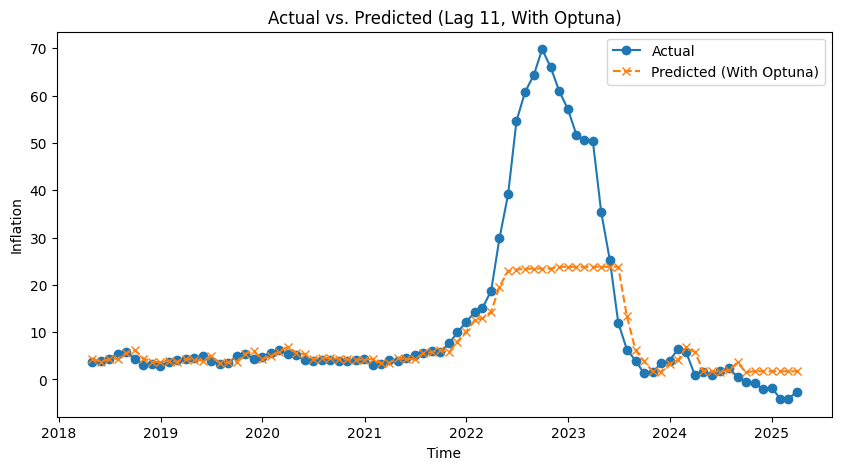

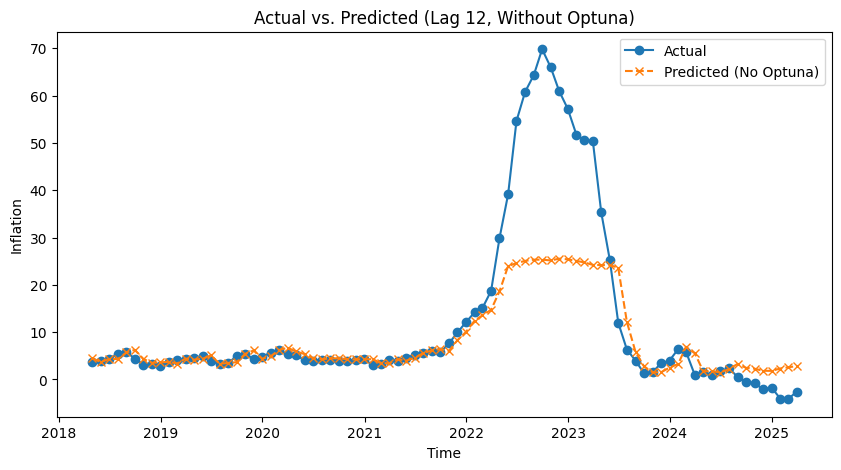

[I 2025-05-29 04:02:28,874] A new study created in memory with name: no-name-c43c66ff-ab8f-47f4-bf9d-e82856f72337
[I 2025-05-29 04:02:30,137] Trial 0 finished with value: 2.85694686383461 and parameters: {'n_estimators': 100, 'max_depth': 35, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 0 with value: 2.85694686383461.
[I 2025-05-29 04:02:31,466] Trial 1 finished with value: 2.8896582817920304 and parameters: {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 0 with value: 2.85694686383461.
[I 2025-05-29 04:02:33,089] Trial 2 finished with value: 2.8282758773076835 and parameters: {'n_estimators': 200, 'max_depth': 45, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 2 with value: 2.8282758773076835.
[I 2025-05-29 04:02:35,446] Trial 3 finished with value: 2.9026897199878774 and parameters: {'n_estimators': 250, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 2 with value: 2.8

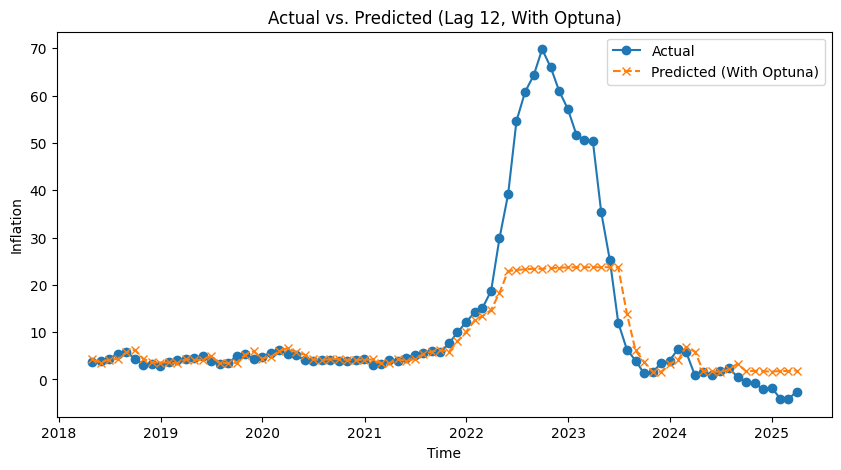

In [12]:
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# Initialize results list
results = []

# Loop through lag terms from 1 to 12
for max_lag in range(1, 13):
    df_lagged = df.copy()

    # Create lag features
    for lag in range(1, max_lag + 1):
        df_lagged[f'Inflation_Lag_{lag}'] = df_lagged['Inflation'].shift(lag)

    # Drop NaN values
    df_lagged = df_lagged.dropna()

    # Split into train and test sets
    train_size = int(0.7 * len(df_lagged))
    train, test = df_lagged[:train_size], df_lagged[train_size:]

    y_train, y_test = train['Inflation'], test['Inflation']
    X_train = train[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]
    X_test = test[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]

    # Train Random Forest model without Optuna
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    results.append([max_lag, 'Without Optuna', rmse, mse, mae, mape, r2, "N/A"])

    # Plot actual vs. predicted
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.index, y_test, label="Actual", marker='o')
    plt.plot(y_test.index, y_pred, label="Predicted (No Optuna)", linestyle='dashed', marker='x')
    plt.title(f'Actual vs. Predicted (Lag {max_lag}, Without Optuna)')
    plt.xlabel("Time")
    plt.ylabel("Inflation")
    plt.legend()
    plt.show()

    # Define Optuna objective function
    def objective(trial):
        n_estimators = trial.suggest_int("n_estimators", 50, 300, step=50)
        max_depth = trial.suggest_int("max_depth", 5, 50, step=5)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)

        rf_model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

        tscv = TimeSeriesSplit(n_splits=5)
        rmse_scores = []
        for train_idx, val_idx in tscv.split(X_train):
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

            rf_model.fit(X_train_fold, y_train_fold)
            y_pred_fold = rf_model.predict(X_val_fold)
            rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_pred_fold)))

        return np.mean(rmse_scores)

    # Run Optuna optimization
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=20)
    best_params = study.best_params

    # Train best model
    rf_best = RandomForestRegressor(**best_params, random_state=42)
    rf_best.fit(X_train, y_train)
    y_pred_optuna = rf_best.predict(X_test)

    # Evaluate Optuna model
    mse_optuna = mean_squared_error(y_test, y_pred_optuna)
    rmse_optuna = np.sqrt(mse_optuna)
    mae_optuna = mean_absolute_error(y_test, y_pred_optuna)
    mape_optuna = np.mean(np.abs((y_test - y_pred_optuna) / y_test)) * 100
    r2_optuna = r2_score(y_test, y_pred_optuna)

    results.append([max_lag, 'With Optuna', rmse_optuna, mse_optuna, mae_optuna, mape_optuna, r2_optuna, best_params])

    # Plot actual vs. predicted for Optuna
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.index, y_test, label="Actual", marker='o')
    plt.plot(y_test.index, y_pred_optuna, label="Predicted (With Optuna)", linestyle='dashed', marker='x')
    plt.title(f'Actual vs. Predicted (Lag {max_lag}, With Optuna)')
    plt.xlabel("Time")
    plt.ylabel("Inflation")
    plt.legend()
    plt.show()

# Save results to CSV
results_df = pd.DataFrame(results, columns=['Lag Terms', 'Model Type', 'Test RMSE', 'Test MSE', 'Test MAE', 'Test MAPE', 'Test R^2', 'Best Parameters'])
results_df.to_csv('random_forest_lag_results_with_r2.csv', index=False)


### Excel file saved as RF_70_30_model_performance

## XGBoost With DIfferent Lagged Features

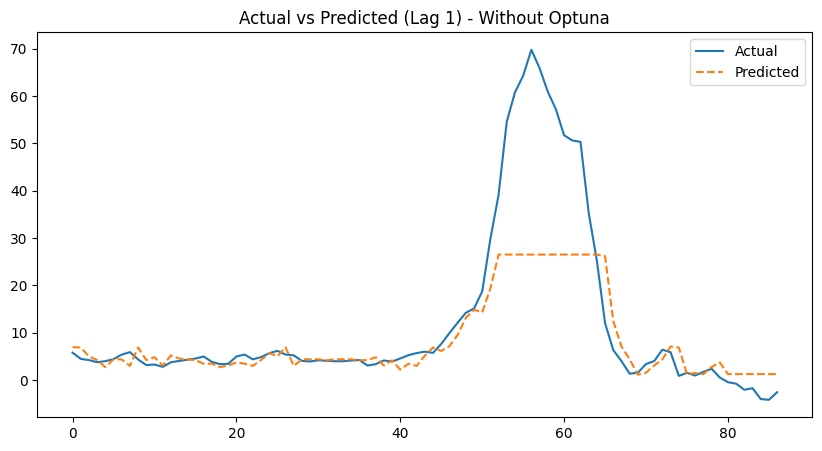

[I 2025-05-29 04:07:30,920] A new study created in memory with name: no-name-f9a63d60-5983-471e-aa41-6cadc2348a9b
[I 2025-05-29 04:07:31,168] Trial 0 finished with value: 2.312865859607545 and parameters: {'n_estimators': 150, 'max_depth': 13, 'learning_rate': 0.26, 'min_child_weight': 10, 'subsample': 0.9, 'colsample_bytree': 1.0}. Best is trial 0 with value: 2.312865859607545.
[I 2025-05-29 04:07:31,722] Trial 1 finished with value: 2.385937289557706 and parameters: {'n_estimators': 300, 'max_depth': 11, 'learning_rate': 0.16000000000000003, 'min_child_weight': 3, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 0 with value: 2.312865859607545.
[I 2025-05-29 04:07:31,945] Trial 2 finished with value: 2.618707680012233 and parameters: {'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.01, 'min_child_weight': 8, 'subsample': 0.7, 'colsample_bytree': 0.8}. Best is trial 0 with value: 2.312865859607545.
[I 2025-05-29 04:07:32,063] Trial 3 finished with value: 4.03234612137

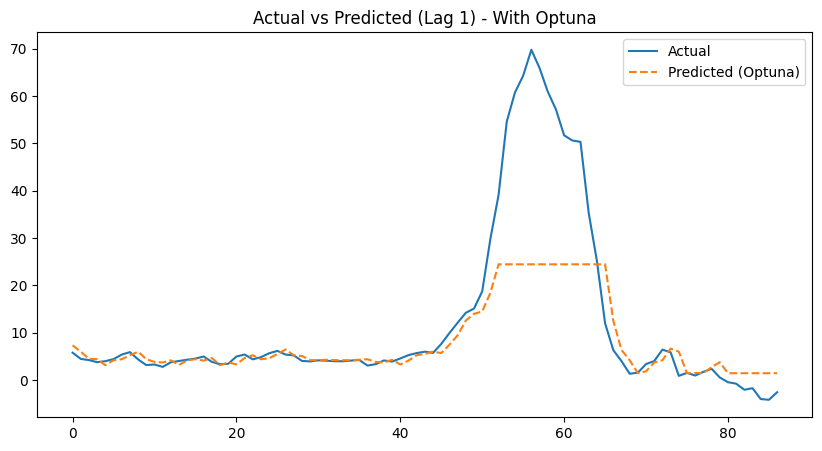

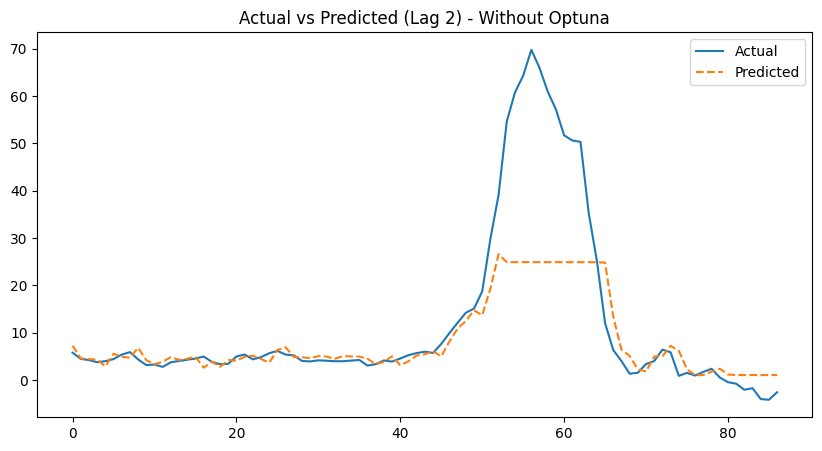

[I 2025-05-29 04:07:38,421] A new study created in memory with name: no-name-6d35c66e-5427-4161-a28d-6def798fced1
[I 2025-05-29 04:07:38,812] Trial 0 finished with value: 2.499573756069498 and parameters: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.9}. Best is trial 0 with value: 2.499573756069498.
[I 2025-05-29 04:07:39,218] Trial 1 finished with value: 2.863709503083242 and parameters: {'n_estimators': 200, 'max_depth': 15, 'learning_rate': 0.21000000000000002, 'min_child_weight': 4, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 0 with value: 2.499573756069498.
[I 2025-05-29 04:07:39,327] Trial 2 finished with value: 2.5527963357907253 and parameters: {'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.21000000000000002, 'min_child_weight': 10, 'subsample': 0.6, 'colsample_bytree': 0.5}. Best is trial 0 with value: 2.499573756069498.
[I 2025-05-29 04:07:39,702] Trial 3 finished with value:

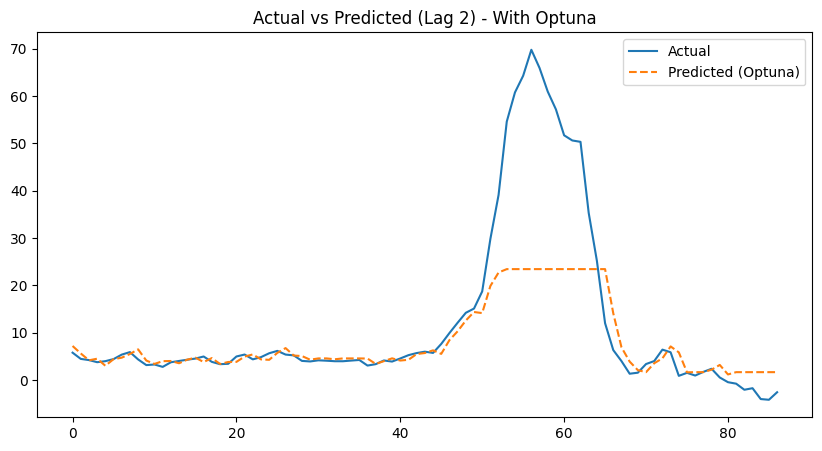

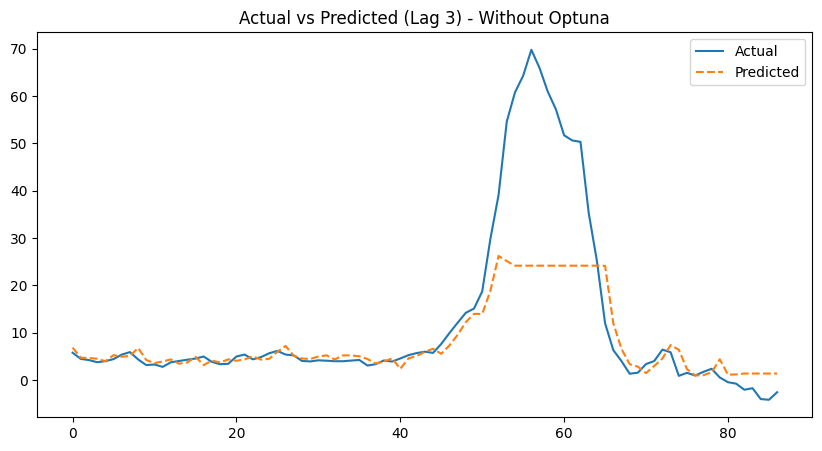

[I 2025-05-29 04:07:43,971] A new study created in memory with name: no-name-e4055a73-8b14-4b40-8aa3-f090405da094
[I 2025-05-29 04:07:44,271] Trial 0 finished with value: 2.6532744921221765 and parameters: {'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.060000000000000005, 'min_child_weight': 1, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 0 with value: 2.6532744921221765.
[I 2025-05-29 04:07:44,633] Trial 1 finished with value: 2.4635992812688015 and parameters: {'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.11, 'min_child_weight': 1, 'subsample': 1.0, 'colsample_bytree': 0.9}. Best is trial 1 with value: 2.4635992812688015.
[I 2025-05-29 04:07:45,008] Trial 2 finished with value: 2.7451633095435577 and parameters: {'n_estimators': 250, 'max_depth': 11, 'learning_rate': 0.21000000000000002, 'min_child_weight': 9, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 1 with value: 2.4635992812688015.
[I 2025-05-29 04:07:45,771] Trial 3 finished with 

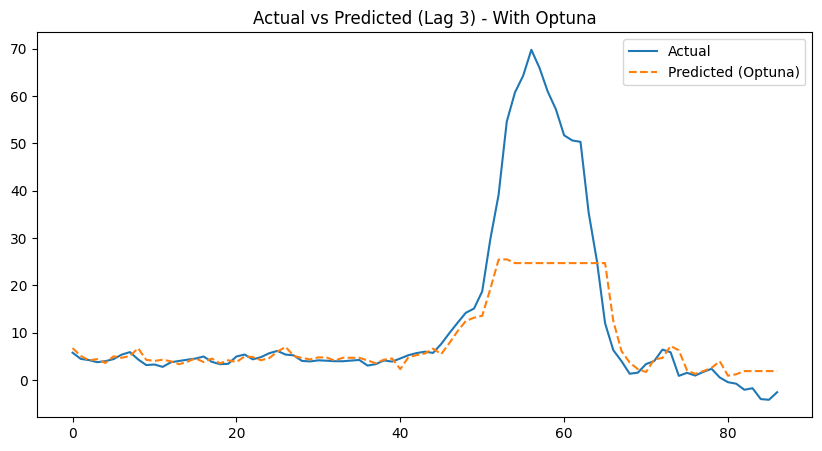

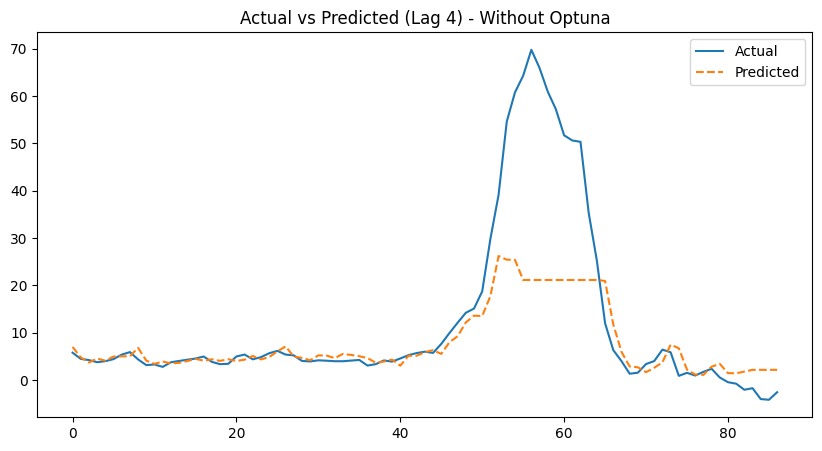

[I 2025-05-29 04:07:55,298] A new study created in memory with name: no-name-c05d0701-4ef0-44e4-b400-fe05e4832834
[I 2025-05-29 04:07:55,534] Trial 0 finished with value: 2.7192926585891923 and parameters: {'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.01, 'min_child_weight': 1, 'subsample': 1.0, 'colsample_bytree': 0.9}. Best is trial 0 with value: 2.7192926585891923.
[I 2025-05-29 04:07:55,916] Trial 1 finished with value: 2.525387069061393 and parameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 8, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 1 with value: 2.525387069061393.
[I 2025-05-29 04:07:56,195] Trial 2 finished with value: 2.940457786221604 and parameters: {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.01, 'min_child_weight': 7, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 1 with value: 2.525387069061393.
[I 2025-05-29 04:07:56,407] Trial 3 finished with value: 2.869511234671589 and paramet

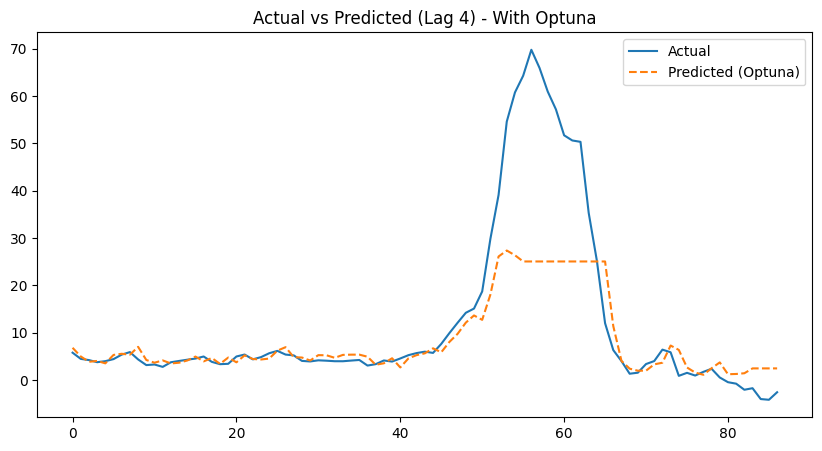

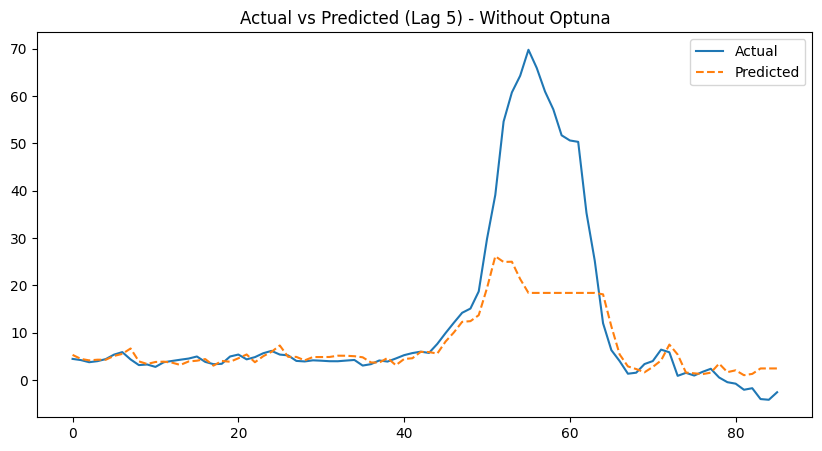

[I 2025-05-29 04:08:03,228] A new study created in memory with name: no-name-cb4074f3-e1f2-4a57-9f92-175b7175b0a0
[I 2025-05-29 04:08:03,537] Trial 0 finished with value: 2.5639405218503066 and parameters: {'n_estimators': 200, 'max_depth': 11, 'learning_rate': 0.21000000000000002, 'min_child_weight': 9, 'subsample': 0.5, 'colsample_bytree': 0.9}. Best is trial 0 with value: 2.5639405218503066.
[I 2025-05-29 04:08:04,020] Trial 1 finished with value: 2.670364546285831 and parameters: {'n_estimators': 300, 'max_depth': 15, 'learning_rate': 0.21000000000000002, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 0 with value: 2.5639405218503066.
[I 2025-05-29 04:08:04,376] Trial 2 finished with value: 2.5457577188209615 and parameters: {'n_estimators': 250, 'max_depth': 15, 'learning_rate': 0.16000000000000003, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 2 with value: 2.5457577188209615.
[I 2025-05-29 04:08:04,670] Trial 3

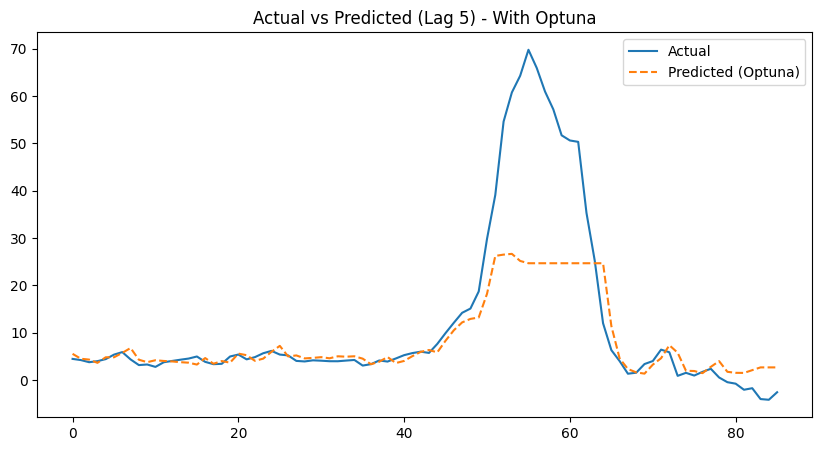

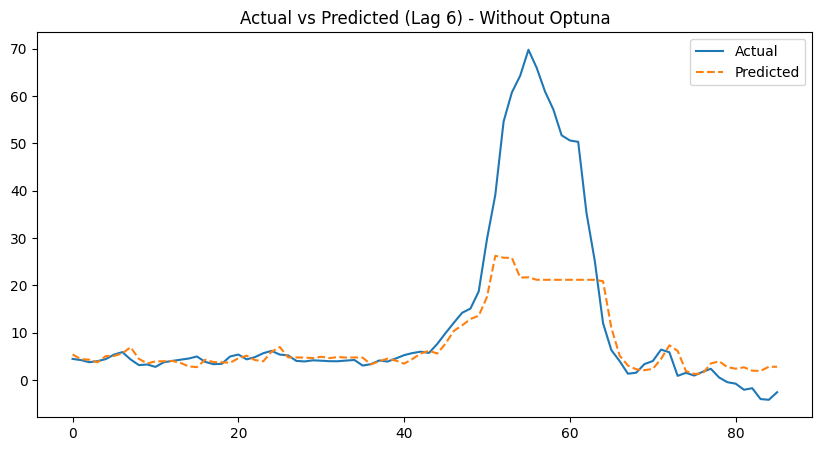

[I 2025-05-29 04:08:15,454] A new study created in memory with name: no-name-2be63e10-80f3-452c-a709-a401482bc8c4
[I 2025-05-29 04:08:16,856] Trial 0 finished with value: 2.488545351826844 and parameters: {'n_estimators': 250, 'max_depth': 9, 'learning_rate': 0.11, 'min_child_weight': 5, 'subsample': 0.5, 'colsample_bytree': 0.7}. Best is trial 0 with value: 2.488545351826844.
[I 2025-05-29 04:08:18,232] Trial 1 finished with value: 2.528147997266828 and parameters: {'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.11, 'min_child_weight': 6, 'subsample': 0.8, 'colsample_bytree': 0.8}. Best is trial 0 with value: 2.488545351826844.
[I 2025-05-29 04:08:19,658] Trial 2 finished with value: 2.4304562727092596 and parameters: {'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.11, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 2 with value: 2.4304562727092596.
[I 2025-05-29 04:08:20,432] Trial 3 finished with value: 2.506388810534122 and paramet

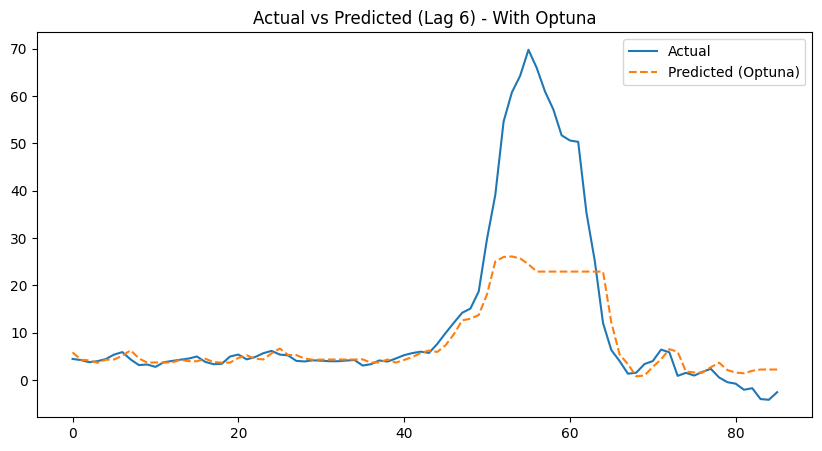

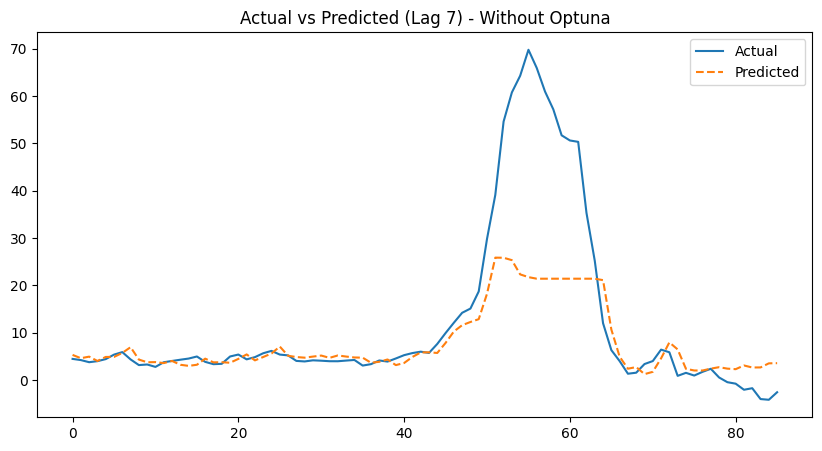

[I 2025-05-29 04:08:30,822] A new study created in memory with name: no-name-54af54fc-d83c-45fd-a131-da922b275078
[I 2025-05-29 04:08:31,204] Trial 0 finished with value: 2.6906470666953775 and parameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.26, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.7}. Best is trial 0 with value: 2.6906470666953775.
[I 2025-05-29 04:08:31,926] Trial 1 finished with value: 2.7835345723030454 and parameters: {'n_estimators': 200, 'max_depth': 11, 'learning_rate': 0.01, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.9}. Best is trial 0 with value: 2.6906470666953775.
[I 2025-05-29 04:08:32,334] Trial 2 finished with value: 2.5612546369801796 and parameters: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'min_child_weight': 7, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 2 with value: 2.5612546369801796.
[I 2025-05-29 04:08:33,464] Trial 3 finished with value: 2.755710439934659 and pa

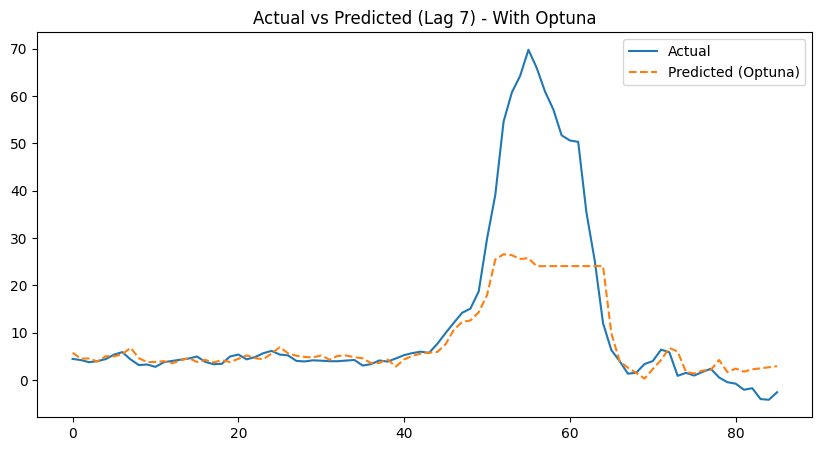

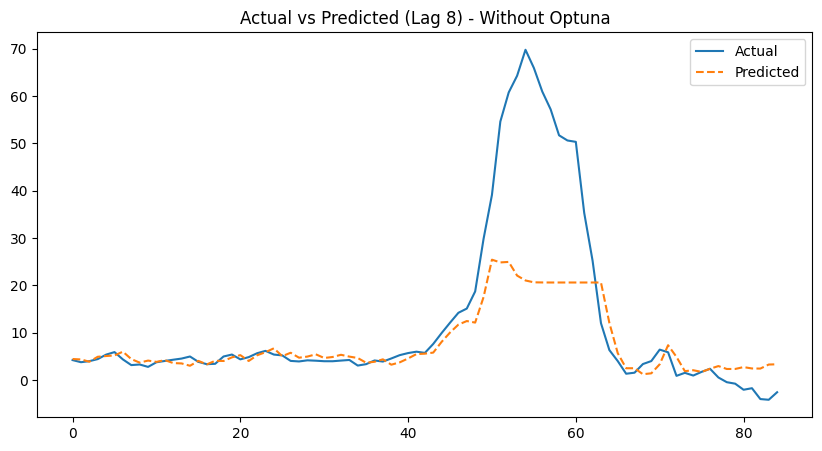

[I 2025-05-29 04:08:45,359] A new study created in memory with name: no-name-618b3333-61c9-43ac-9006-ba40aa0ff118
[I 2025-05-29 04:08:45,826] Trial 0 finished with value: 2.5835591938534366 and parameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.060000000000000005, 'min_child_weight': 7, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 0 with value: 2.5835591938534366.
[I 2025-05-29 04:08:46,009] Trial 1 finished with value: 2.803618611171702 and parameters: {'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.21000000000000002, 'min_child_weight': 6, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 0 with value: 2.5835591938534366.
[I 2025-05-29 04:08:46,332] Trial 2 finished with value: 2.603628130380997 and parameters: {'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.11, 'min_child_weight': 10, 'subsample': 0.9, 'colsample_bytree': 0.8}. Best is trial 0 with value: 2.5835591938534366.
[I 2025-05-29 04:08:46,663] Trial 3 finished with val

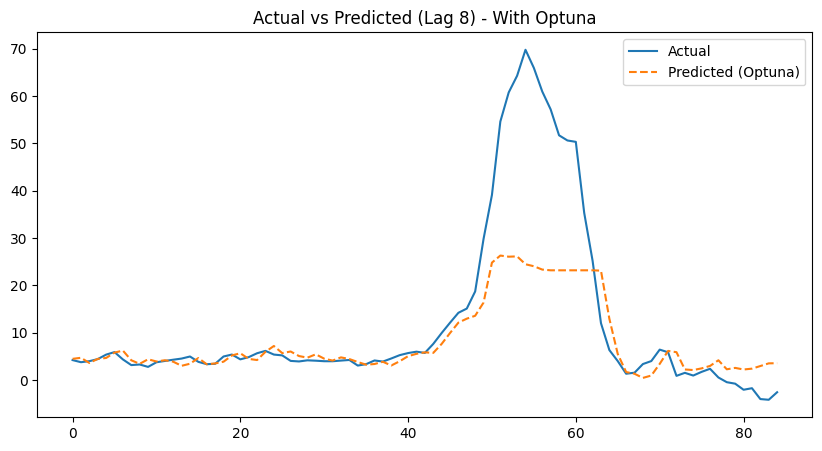

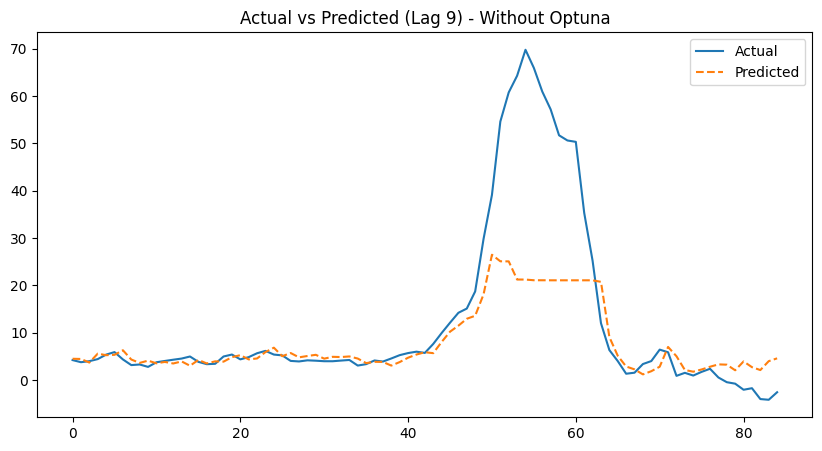

[I 2025-05-29 04:09:10,772] A new study created in memory with name: no-name-757bf67c-764d-4c45-8df9-94d9e3e59f97
[I 2025-05-29 04:09:11,048] Trial 0 finished with value: 3.6309398977317584 and parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.01, 'min_child_weight': 9, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 0 with value: 3.6309398977317584.
[I 2025-05-29 04:09:11,356] Trial 1 finished with value: 2.7864655351197003 and parameters: {'n_estimators': 100, 'max_depth': 13, 'learning_rate': 0.11, 'min_child_weight': 6, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 1 with value: 2.7864655351197003.
[I 2025-05-29 04:09:12,061] Trial 2 finished with value: 2.803878336991376 and parameters: {'n_estimators': 200, 'max_depth': 13, 'learning_rate': 0.21000000000000002, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 1.0}. Best is trial 1 with value: 2.7864655351197003.
[I 2025-05-29 04:09:12,252] Trial 3 finished with value: 4.4225344

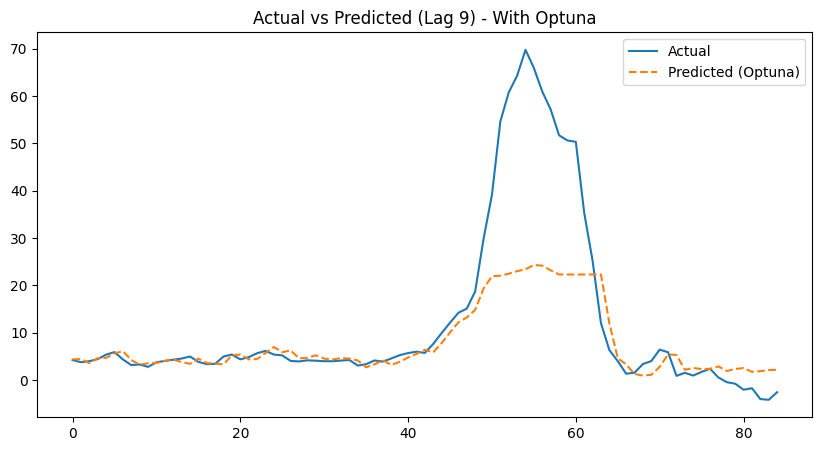

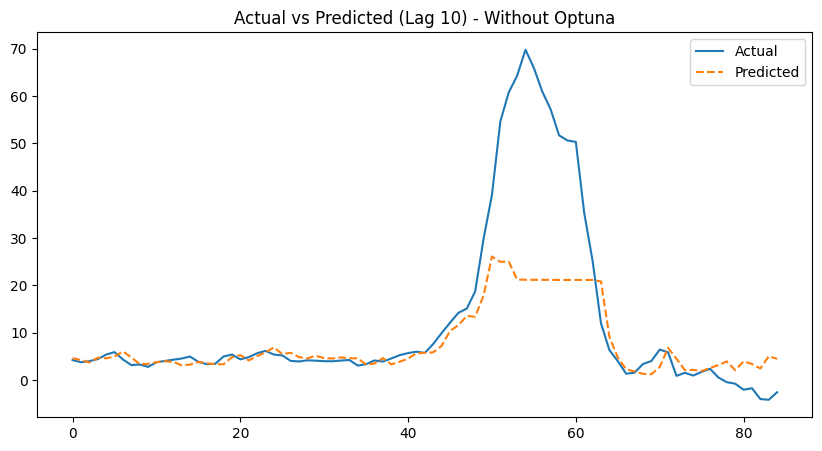

[I 2025-05-29 04:09:21,840] A new study created in memory with name: no-name-58013d1b-3c6d-40d0-baa8-657b362b8bc8
[I 2025-05-29 04:09:22,582] Trial 0 finished with value: 3.347542928583426 and parameters: {'n_estimators': 200, 'max_depth': 13, 'learning_rate': 0.01, 'min_child_weight': 2, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 0 with value: 3.347542928583426.
[I 2025-05-29 04:09:23,126] Trial 1 finished with value: 2.808306822506732 and parameters: {'n_estimators': 250, 'max_depth': 11, 'learning_rate': 0.060000000000000005, 'min_child_weight': 9, 'subsample': 0.8, 'colsample_bytree': 0.8}. Best is trial 1 with value: 2.808306822506732.
[I 2025-05-29 04:09:23,725] Trial 2 finished with value: 3.491750972166919 and parameters: {'n_estimators': 150, 'max_depth': 13, 'learning_rate': 0.01, 'min_child_weight': 2, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 1 with value: 2.808306822506732.
[I 2025-05-29 04:09:24,042] Trial 3 finished with value: 2.8775982946

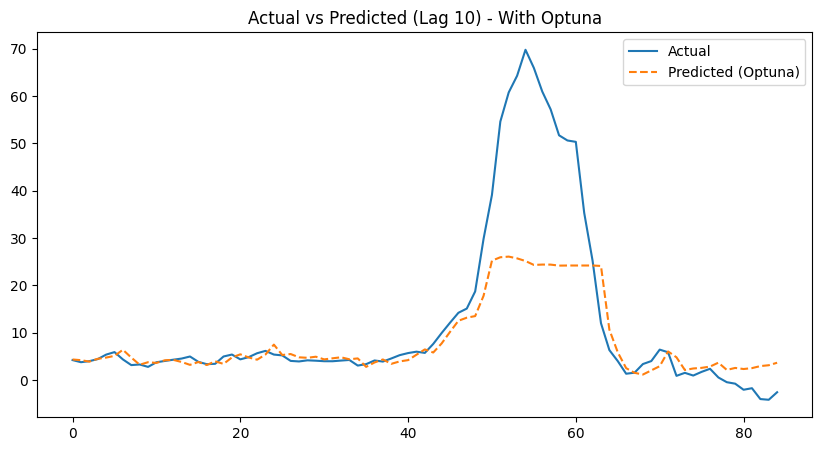

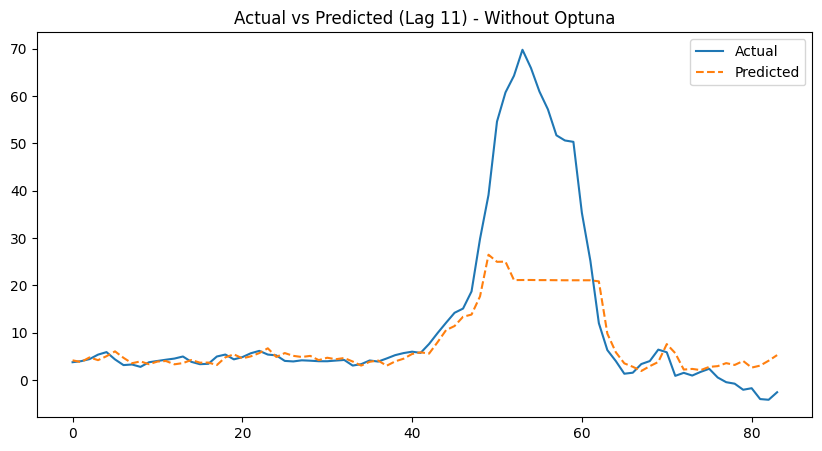

[I 2025-05-29 04:09:37,502] A new study created in memory with name: no-name-0e645335-52ee-4197-9aef-fddc7ab15c79
[I 2025-05-29 04:09:38,286] Trial 0 finished with value: 3.313489654624738 and parameters: {'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.21000000000000002, 'min_child_weight': 8, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 0 with value: 3.313489654624738.
[I 2025-05-29 04:09:38,583] Trial 1 finished with value: 3.291390845913422 and parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.11, 'min_child_weight': 9, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 1 with value: 3.291390845913422.
[I 2025-05-29 04:09:39,158] Trial 2 finished with value: 3.0244782041563645 and parameters: {'n_estimators': 200, 'max_depth': 11, 'learning_rate': 0.26, 'min_child_weight': 7, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 2 with value: 3.0244782041563645.
[I 2025-05-29 04:09:39,571] Trial 3 finished with value: 4.08658516064

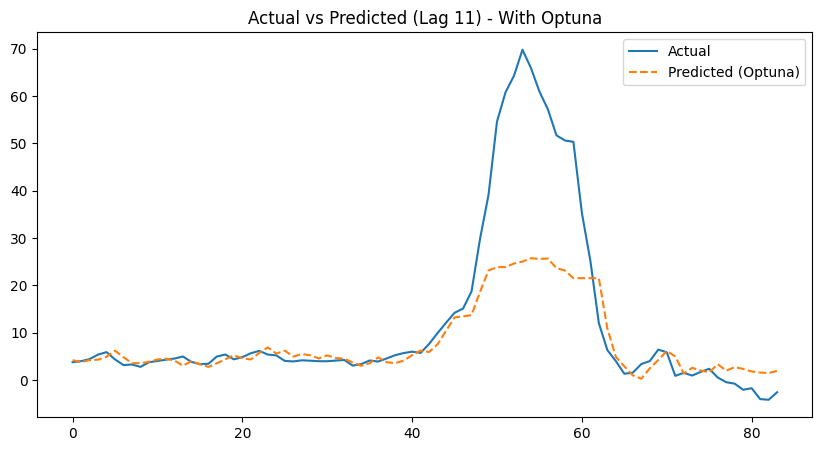

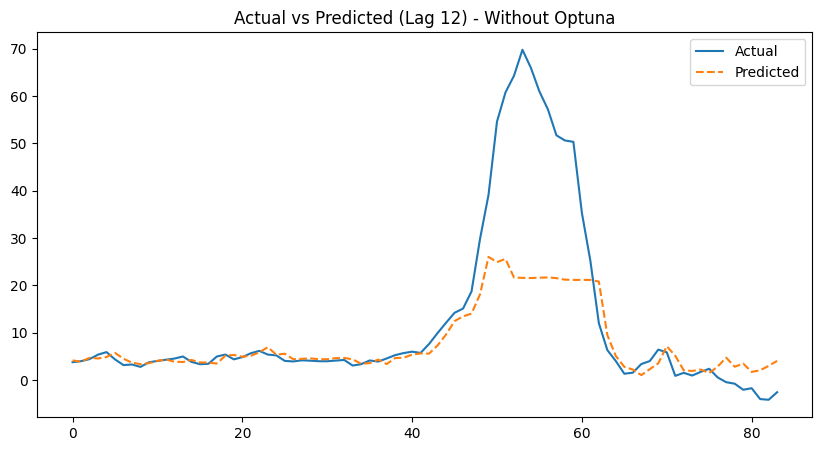

[I 2025-05-29 04:09:50,887] A new study created in memory with name: no-name-24f25ac8-44d1-425e-8400-2eea247ca8e8
[I 2025-05-29 04:09:51,330] Trial 0 finished with value: 3.282170649488785 and parameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.16000000000000003, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.5}. Best is trial 0 with value: 3.282170649488785.
[I 2025-05-29 04:09:51,588] Trial 1 finished with value: 4.7540779935994255 and parameters: {'n_estimators': 50, 'max_depth': 11, 'learning_rate': 0.01, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.5}. Best is trial 0 with value: 3.282170649488785.
[I 2025-05-29 04:09:53,395] Trial 2 finished with value: 3.2913608954532947 and parameters: {'n_estimators': 250, 'max_depth': 11, 'learning_rate': 0.060000000000000005, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 0 with value: 3.282170649488785.
[I 2025-05-29 04:09:53,572] Trial 3 finished with valu

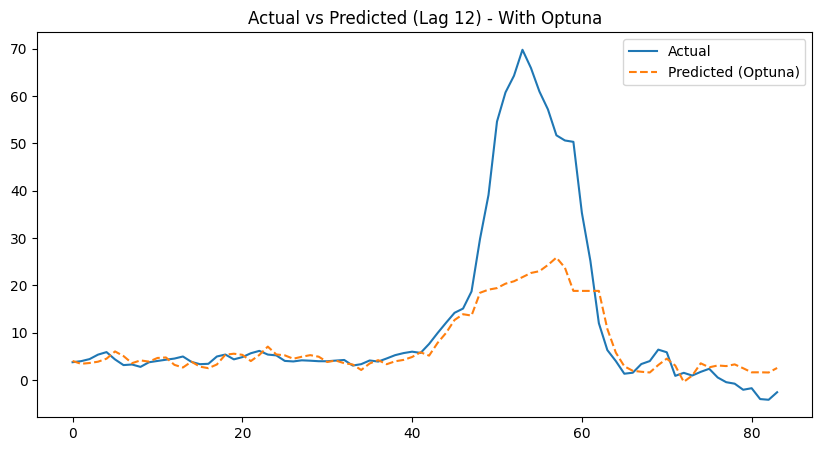

In [14]:
import pandas as pd
import numpy as np
import optuna
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# Initialize results list
results = []

# Loop through lag terms from 1 to 12
for max_lag in range(1, 13):
    df_lagged = df.copy()

    # Create lag features
    for lag in range(1, max_lag + 1):
        df_lagged[f'Inflation_Lag_{lag}'] = df_lagged['Inflation'].shift(lag)

    # Drop NaN values
    df_lagged = df_lagged.dropna()

    # Split into train and test sets
    train_size = int(0.7 * len(df_lagged))
    train, test = df_lagged[:train_size], df_lagged[train_size:]

    y_train, y_test = train['Inflation'], test['Inflation']
    X_train = train[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]
    X_test = test[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]

    # Train XGBoost model without Optuna
    xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    results.append([max_lag, 'Without Optuna', rmse, mse, mae, mape, r2, 'N/A'])

    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted', linestyle='dashed')
    plt.title(f'Actual vs Predicted (Lag {max_lag}) - Without Optuna')
    plt.legend()
    plt.show()

    # Define Optuna objective function
    def objective(trial):
        n_estimators = trial.suggest_int("n_estimators", 50, 300, step=50)
        max_depth = trial.suggest_int("max_depth", 3, 15, step=2)
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3, step=0.05)
        min_child_weight = trial.suggest_int("min_child_weight", 1, 10)
        subsample = trial.suggest_float("subsample", 0.5, 1.0, step=0.1)
        colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0, step=0.1)

        xgb_model = xgb.XGBRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            min_child_weight=min_child_weight,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            random_state=42
        )

        tscv = TimeSeriesSplit(n_splits=5)
        rmse_scores = []
        for train_idx, val_idx in tscv.split(X_train):
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

            xgb_model.fit(X_train_fold, y_train_fold)
            y_pred_fold = xgb_model.predict(X_val_fold)
            rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_pred_fold)))

        return np.mean(rmse_scores)

    # Run Optuna optimization
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=20)
    best_params = study.best_params

    # Train best model
    xgb_best = xgb.XGBRegressor(**best_params, random_state=42)
    xgb_best.fit(X_train, y_train)
    y_pred_optuna = xgb_best.predict(X_test)

    # Evaluate Optuna model
    mse_optuna = mean_squared_error(y_test, y_pred_optuna)
    rmse_optuna = np.sqrt(mse_optuna)
    mae_optuna = mean_absolute_error(y_test, y_pred_optuna)
    mape_optuna = np.mean(np.abs((y_test - y_pred_optuna) / y_test)) * 100
    r2_optuna = r2_score(y_test, y_pred_optuna)

    results.append([max_lag, 'With Optuna', rmse_optuna, mse_optuna, mae_optuna, mape_optuna, r2_optuna, best_params])

    # Plot actual vs. predicted values for Optuna model
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred_optuna, label='Predicted (Optuna)', linestyle='dashed')
    plt.title(f'Actual vs Predicted (Lag {max_lag}) - With Optuna')
    plt.legend()
    plt.show()

# Save results to CSV
results_df = pd.DataFrame(results, columns=['Lag Terms', 'Model Type', 'Test RMSE', 'Test MSE', 'Test MAE', 'Test MAPE', 'Test R2', 'Best Params'])
results_df.to_csv('xgboost_lag_results_with_r2.csv', index=False)


### Excel file saved as XGB_70_30_model_performance

## SVR

## SVR with plots and parameter values

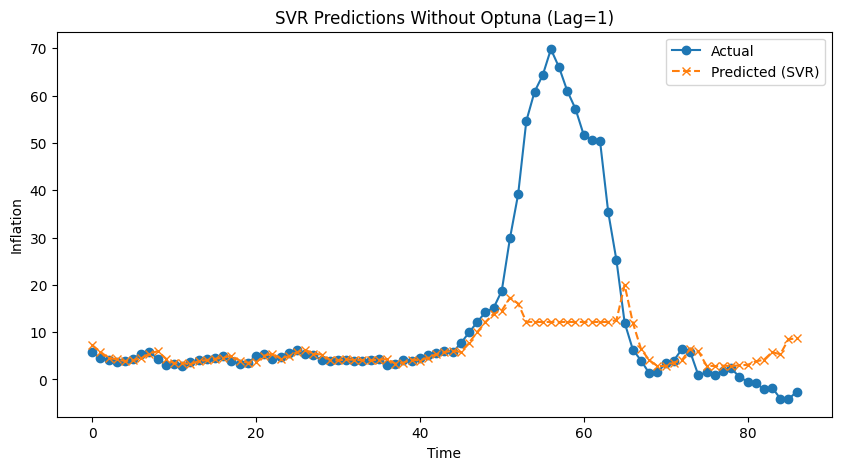

[I 2025-05-29 04:10:05,123] A new study created in memory with name: no-name-9308250f-242b-4586-b2c7-395d688cec13
[I 2025-05-29 04:10:05,159] Trial 0 finished with value: 2.543031467555381 and parameters: {'C': 6.741701777341908, 'epsilon': 0.46105184972910723, 'kernel': 'rbf'}. Best is trial 0 with value: 2.543031467555381.
[I 2025-05-29 04:10:05,377] Trial 1 finished with value: 4.87062127190107 and parameters: {'C': 4.013395129496658, 'epsilon': 0.4842739090127566, 'kernel': 'poly'}. Best is trial 0 with value: 2.543031467555381.
[I 2025-05-29 04:10:05,523] Trial 2 finished with value: 4.7127756529764655 and parameters: {'C': 2.327107777914271, 'epsilon': 0.05219347302873534, 'kernel': 'poly'}. Best is trial 0 with value: 2.543031467555381.
[I 2025-05-29 04:10:05,554] Trial 3 finished with value: 2.5704855414365326 and parameters: {'C': 2.647079232171607, 'epsilon': 0.6874196955227885, 'kernel': 'rbf'}. Best is trial 0 with value: 2.543031467555381.
[I 2025-05-29 04:10:05,588] Trial

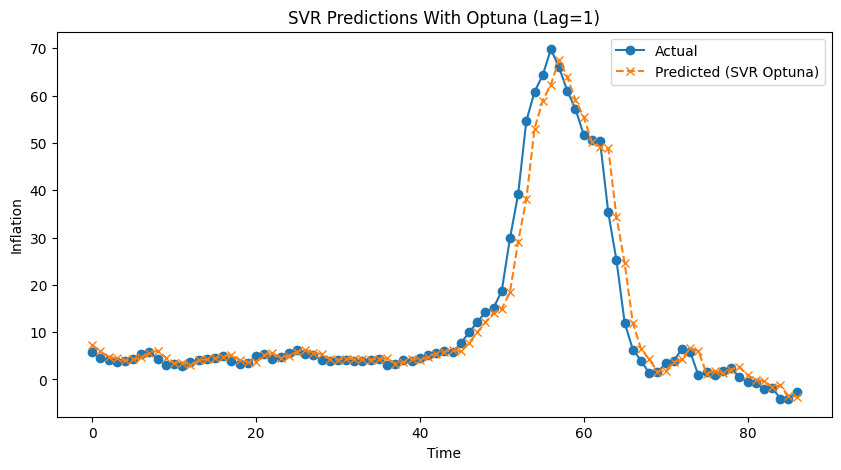

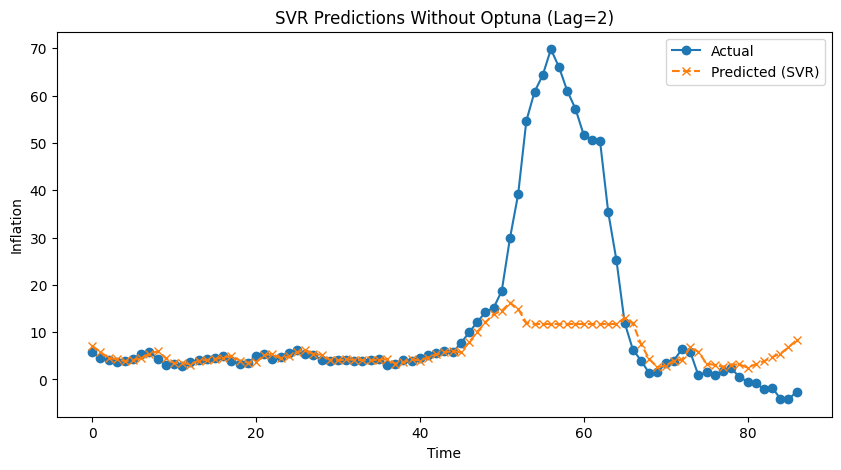

[I 2025-05-29 04:10:07,768] A new study created in memory with name: no-name-f9ce4273-124a-400a-948e-e391a91a5c9d
[I 2025-05-29 04:10:08,248] Trial 0 finished with value: 1.1909873038402892 and parameters: {'C': 9.365853661601488, 'epsilon': 0.052518488826915725, 'kernel': 'linear'}. Best is trial 0 with value: 1.1909873038402892.
[I 2025-05-29 04:10:08,611] Trial 1 finished with value: 5.101495246544402 and parameters: {'C': 3.0276548231826643, 'epsilon': 0.491462306849334, 'kernel': 'poly'}. Best is trial 0 with value: 1.1909873038402892.
[I 2025-05-29 04:10:09,568] Trial 2 finished with value: 4.980645436907569 and parameters: {'C': 7.4068144809493734, 'epsilon': 0.7200578035196545, 'kernel': 'poly'}. Best is trial 0 with value: 1.1909873038402892.
[I 2025-05-29 04:10:09,866] Trial 3 finished with value: 5.076052403480093 and parameters: {'C': 3.737506626782357, 'epsilon': 0.5146474032895101, 'kernel': 'poly'}. Best is trial 0 with value: 1.1909873038402892.
[I 2025-05-29 04:10:09,8

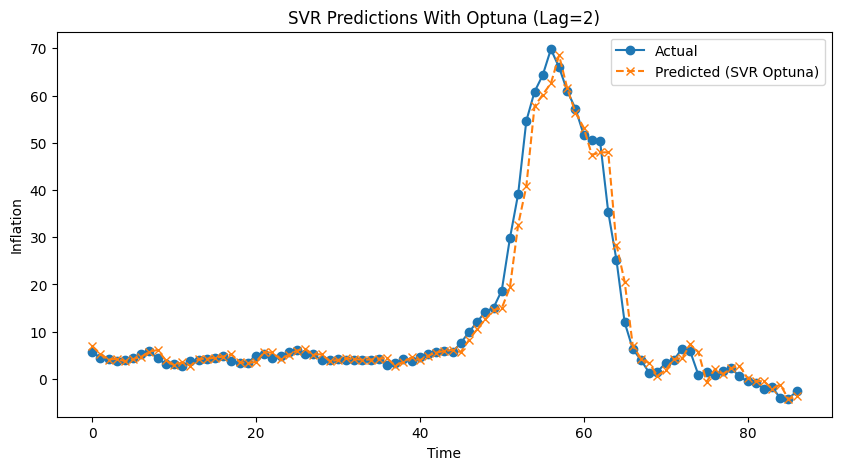

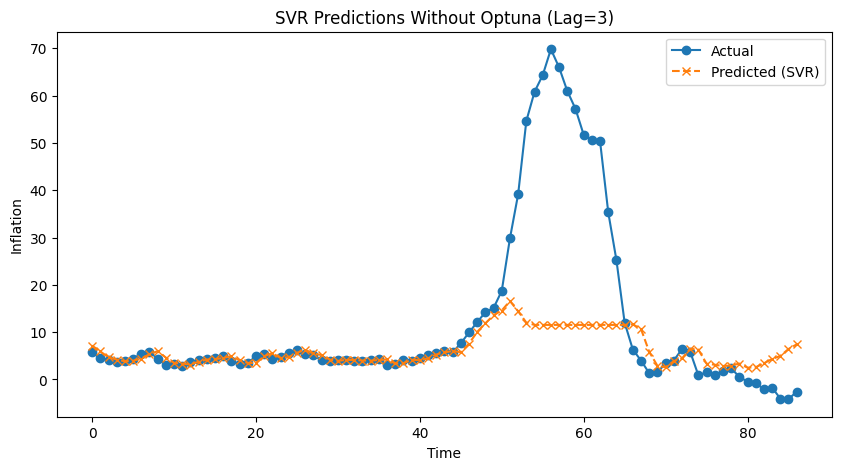

[I 2025-05-29 04:10:11,970] A new study created in memory with name: no-name-a806c934-051a-4b88-8369-526a14ed00c8
[I 2025-05-29 04:10:12,015] Trial 0 finished with value: 29.30727932588409 and parameters: {'C': 4.025944936985994, 'epsilon': 0.09504073025339267, 'kernel': 'sigmoid'}. Best is trial 0 with value: 29.30727932588409.
[I 2025-05-29 04:10:12,364] Trial 1 finished with value: 1.1735685513105283 and parameters: {'C': 9.371521804631023, 'epsilon': 0.7740375788398176, 'kernel': 'linear'}. Best is trial 1 with value: 1.1735685513105283.
[I 2025-05-29 04:10:12,399] Trial 2 finished with value: 2.9450587385028597 and parameters: {'C': 1.0593276043170232, 'epsilon': 0.01475373108449085, 'kernel': 'rbf'}. Best is trial 1 with value: 1.1735685513105283.
[I 2025-05-29 04:10:12,567] Trial 3 finished with value: 5.54190955980531 and parameters: {'C': 2.1790416506166084, 'epsilon': 0.6479860337394021, 'kernel': 'poly'}. Best is trial 1 with value: 1.1735685513105283.
[I 2025-05-29 04:10:12

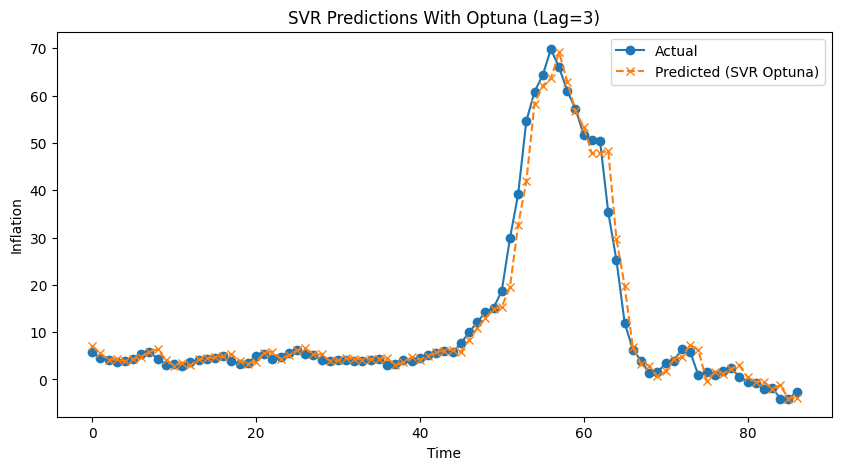

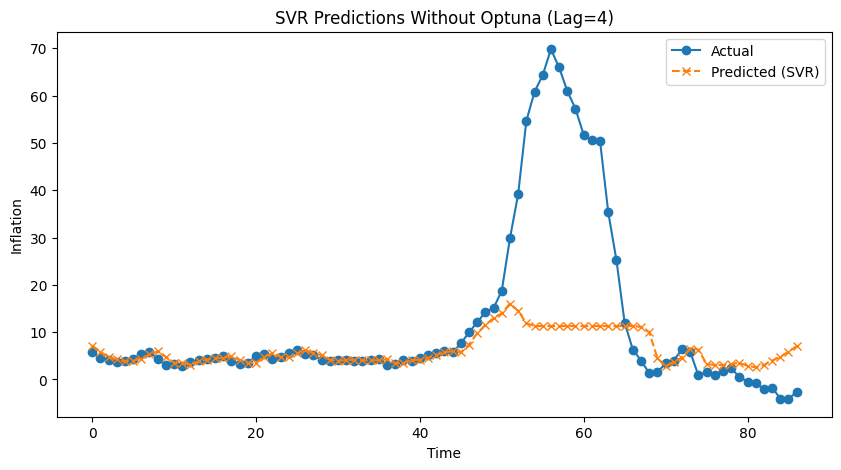

[I 2025-05-29 04:10:15,669] A new study created in memory with name: no-name-61d848b0-6bea-48bc-99b8-6c26f1271a24
[I 2025-05-29 04:10:15,711] Trial 0 finished with value: 7.999075430672676 and parameters: {'C': 0.5206425155438849, 'epsilon': 0.4341141567415028, 'kernel': 'sigmoid'}. Best is trial 0 with value: 7.999075430672676.
[I 2025-05-29 04:10:15,740] Trial 1 finished with value: 3.927375304435889 and parameters: {'C': 0.18955803624668904, 'epsilon': 0.9123422898074144, 'kernel': 'rbf'}. Best is trial 1 with value: 3.927375304435889.
[I 2025-05-29 04:10:15,845] Trial 2 finished with value: 1.2023946297718227 and parameters: {'C': 2.4095365900295445, 'epsilon': 0.03247088935632755, 'kernel': 'linear'}. Best is trial 2 with value: 1.2023946297718227.
[I 2025-05-29 04:10:15,879] Trial 3 finished with value: 37.65763585686142 and parameters: {'C': 5.438787787970166, 'epsilon': 0.6165436035026449, 'kernel': 'sigmoid'}. Best is trial 2 with value: 1.2023946297718227.
[I 2025-05-29 04:10

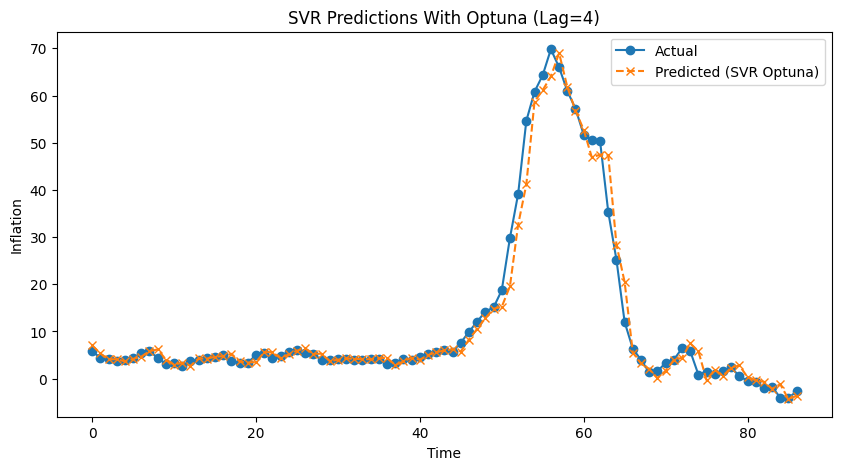

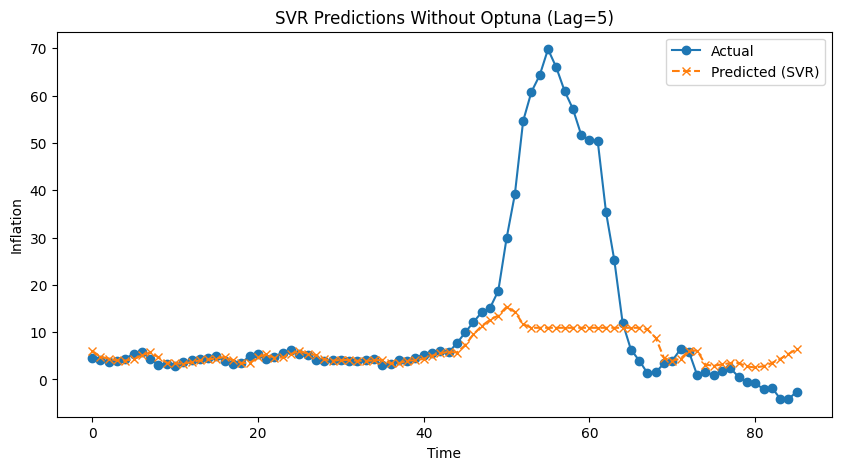

[I 2025-05-29 04:10:22,933] A new study created in memory with name: no-name-da588643-b419-4956-b37e-d38271cf0270
[I 2025-05-29 04:10:23,057] Trial 0 finished with value: 1.314070735031353 and parameters: {'C': 3.2321923009593334, 'epsilon': 0.9719914779787896, 'kernel': 'linear'}. Best is trial 0 with value: 1.314070735031353.
[I 2025-05-29 04:10:23,767] Trial 1 finished with value: 5.576795992050572 and parameters: {'C': 6.461417084009282, 'epsilon': 0.6012689568587702, 'kernel': 'poly'}. Best is trial 0 with value: 1.314070735031353.
[I 2025-05-29 04:10:23,893] Trial 2 finished with value: 1.2386160991657413 and parameters: {'C': 1.321456714623955, 'epsilon': 0.24426181278556808, 'kernel': 'linear'}. Best is trial 2 with value: 1.2386160991657413.
[I 2025-05-29 04:10:23,924] Trial 3 finished with value: 2.901954340971032 and parameters: {'C': 4.833981046427973, 'epsilon': 0.8504439892234861, 'kernel': 'rbf'}. Best is trial 2 with value: 1.2386160991657413.
[I 2025-05-29 04:10:23,958

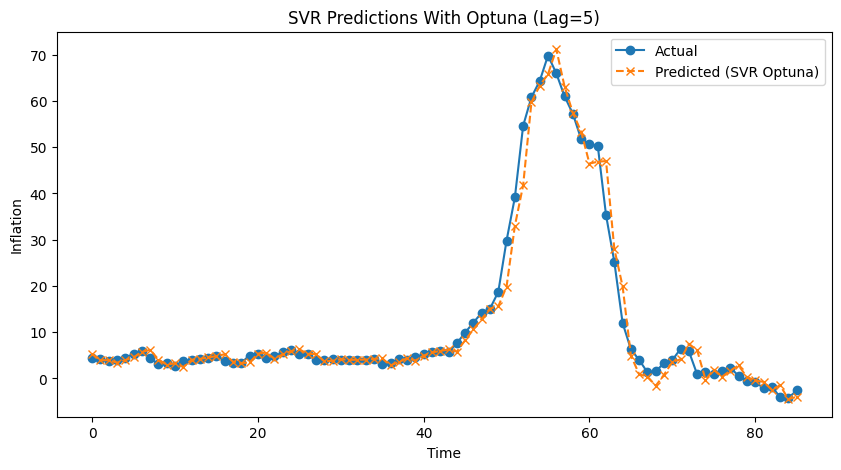

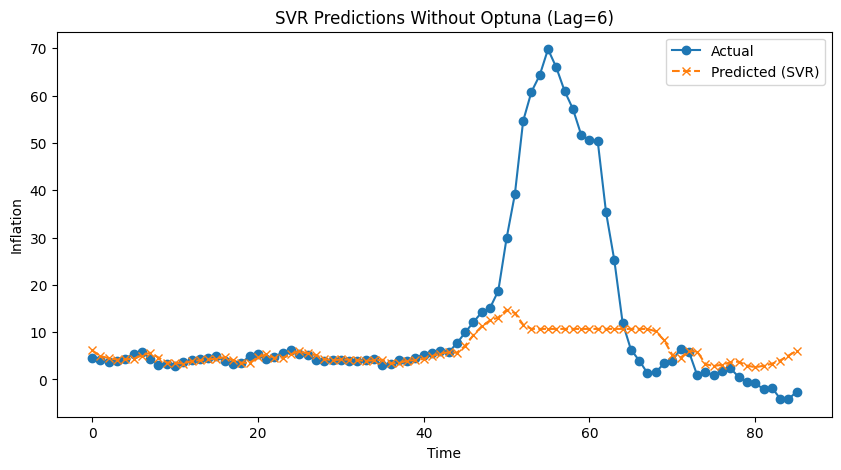

[I 2025-05-29 04:10:28,960] A new study created in memory with name: no-name-87826849-361b-43f5-83e2-e8609d452e5b
[I 2025-05-29 04:10:29,002] Trial 0 finished with value: 2.9871889609619813 and parameters: {'C': 3.2324792029890754, 'epsilon': 0.15493417350696193, 'kernel': 'rbf'}. Best is trial 0 with value: 2.9871889609619813.
[I 2025-05-29 04:10:29,589] Trial 1 finished with value: 6.0289353188126915 and parameters: {'C': 7.4605977305692175, 'epsilon': 0.8566743605367829, 'kernel': 'poly'}. Best is trial 0 with value: 2.9871889609619813.
[I 2025-05-29 04:10:29,931] Trial 2 finished with value: 5.783044854335033 and parameters: {'C': 4.588679252502422, 'epsilon': 0.6590531471864833, 'kernel': 'poly'}. Best is trial 0 with value: 2.9871889609619813.
[I 2025-05-29 04:10:29,968] Trial 3 finished with value: 39.53732581562773 and parameters: {'C': 5.814599510483719, 'epsilon': 0.6014553095362768, 'kernel': 'sigmoid'}. Best is trial 0 with value: 2.9871889609619813.
[I 2025-05-29 04:10:30,

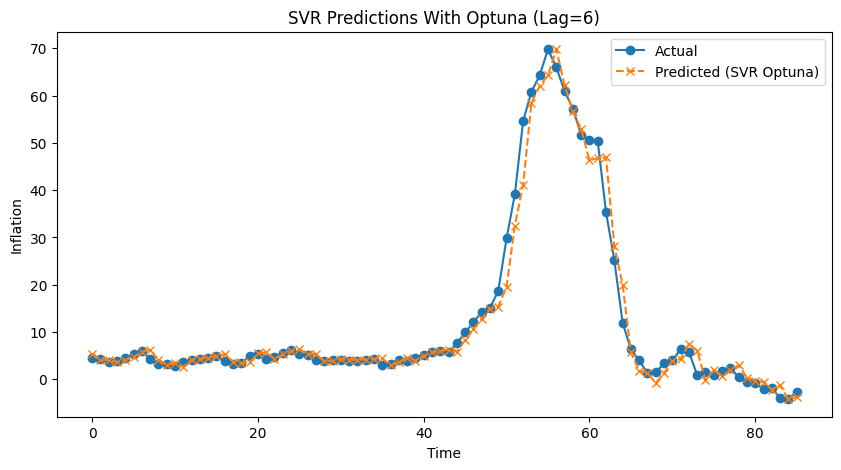

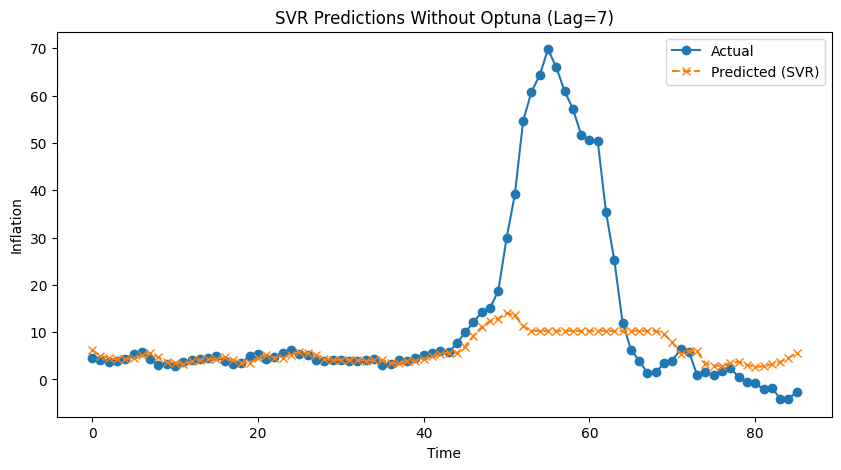

[I 2025-05-29 04:10:36,104] A new study created in memory with name: no-name-8c9b82b1-9bc3-4fc9-84cc-2a01c2012811
[I 2025-05-29 04:10:36,850] Trial 0 finished with value: 1.2813221789249083 and parameters: {'C': 9.502224205608469, 'epsilon': 0.43872389776725323, 'kernel': 'linear'}. Best is trial 0 with value: 1.2813221789249083.
[I 2025-05-29 04:10:36,969] Trial 1 finished with value: 1.2429645469800907 and parameters: {'C': 1.4129079952462267, 'epsilon': 0.8596760286651969, 'kernel': 'linear'}. Best is trial 1 with value: 1.2429645469800907.
[I 2025-05-29 04:10:37,005] Trial 2 finished with value: 39.63023100169228 and parameters: {'C': 5.884986247326658, 'epsilon': 0.956060315362248, 'kernel': 'sigmoid'}. Best is trial 1 with value: 1.2429645469800907.
[I 2025-05-29 04:10:37,038] Trial 3 finished with value: 3.16819018877751 and parameters: {'C': 2.1389336540394166, 'epsilon': 0.08354117160178154, 'kernel': 'rbf'}. Best is trial 1 with value: 1.2429645469800907.
[I 2025-05-29 04:10:

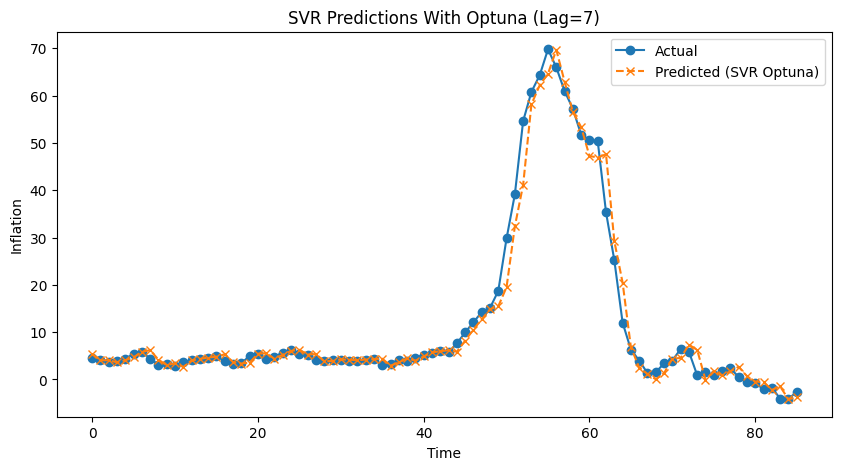

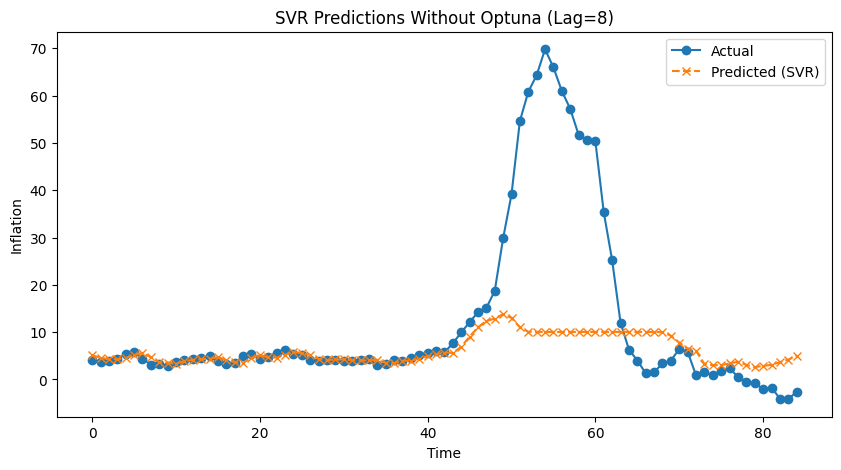

[I 2025-05-29 04:10:43,324] A new study created in memory with name: no-name-dcdaec9b-a9a8-4b14-99e4-e0dc317c852b
[I 2025-05-29 04:10:44,287] Trial 0 finished with value: 5.902858477913991 and parameters: {'C': 9.294684809871326, 'epsilon': 0.7395954485363627, 'kernel': 'poly'}. Best is trial 0 with value: 5.902858477913991.
[I 2025-05-29 04:10:45,472] Trial 1 finished with value: 1.2940889029741083 and parameters: {'C': 7.822516033346225, 'epsilon': 0.3068705581162661, 'kernel': 'linear'}. Best is trial 1 with value: 1.2940889029741083.
[I 2025-05-29 04:10:45,528] Trial 2 finished with value: 41.215583991027884 and parameters: {'C': 6.182670736520394, 'epsilon': 0.2923651602953132, 'kernel': 'sigmoid'}. Best is trial 1 with value: 1.2940889029741083.
[I 2025-05-29 04:10:46,711] Trial 3 finished with value: 1.2932771359318649 and parameters: {'C': 5.80158406191602, 'epsilon': 0.4839063503620248, 'kernel': 'linear'}. Best is trial 3 with value: 1.2932771359318649.
[I 2025-05-29 04:10:46

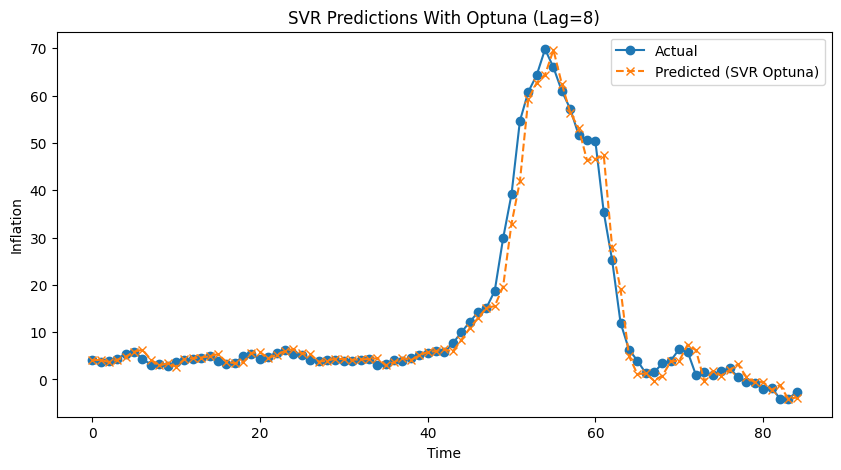

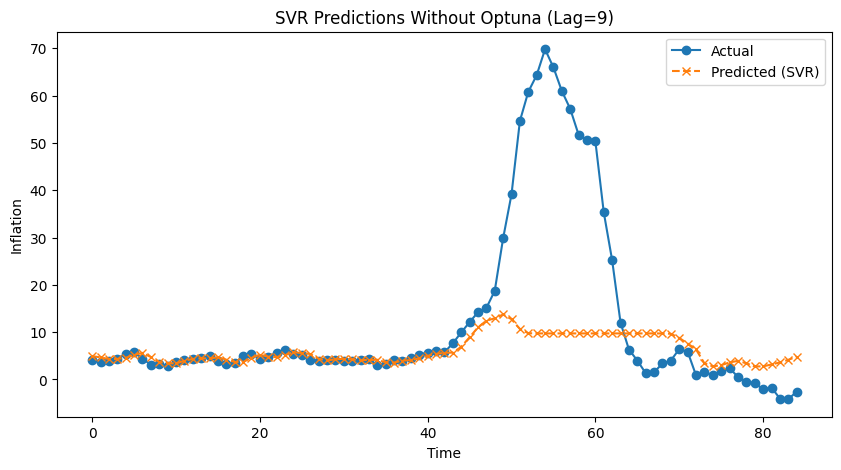

[I 2025-05-29 04:10:52,421] A new study created in memory with name: no-name-aac7f6e5-448d-4db8-b193-03d0054c2802
[I 2025-05-29 04:10:52,466] Trial 0 finished with value: 3.613720502081674 and parameters: {'C': 1.5359790672248854, 'epsilon': 0.9157706963206421, 'kernel': 'rbf'}. Best is trial 0 with value: 3.613720502081674.
[I 2025-05-29 04:10:52,754] Trial 1 finished with value: 5.311255697756086 and parameters: {'C': 3.2960412911217065, 'epsilon': 0.19938082608195937, 'kernel': 'poly'}. Best is trial 0 with value: 3.613720502081674.
[I 2025-05-29 04:10:52,797] Trial 2 finished with value: 57.46667097808286 and parameters: {'C': 8.84415672108778, 'epsilon': 0.7732038933151343, 'kernel': 'sigmoid'}. Best is trial 0 with value: 3.613720502081674.
[I 2025-05-29 04:10:52,835] Trial 3 finished with value: 3.7605644967334726 and parameters: {'C': 0.6427867211832435, 'epsilon': 0.5209332978102327, 'kernel': 'rbf'}. Best is trial 0 with value: 3.613720502081674.
[I 2025-05-29 04:10:52,881] T

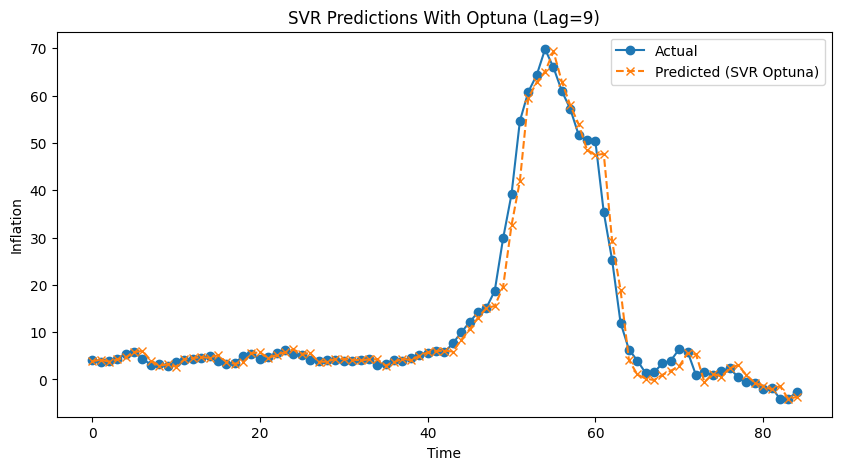

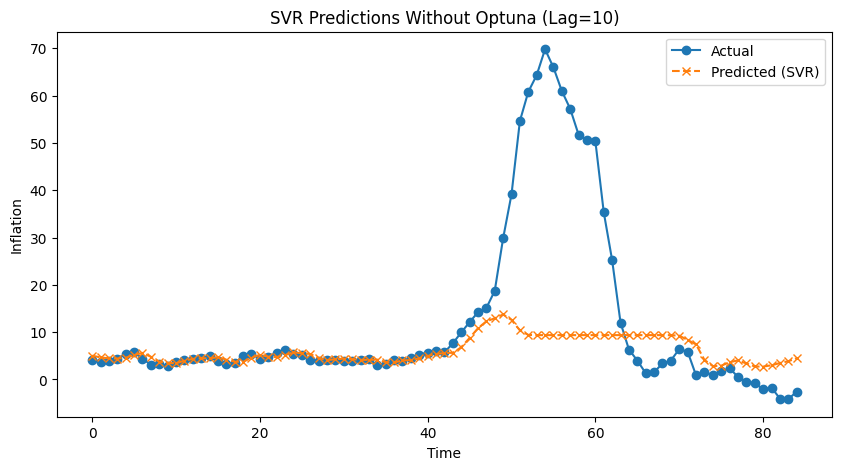

[I 2025-05-29 04:11:04,302] A new study created in memory with name: no-name-478f7b63-dabc-4eda-99d9-e4fd8a2c9f67
[I 2025-05-29 04:11:04,784] Trial 0 finished with value: 5.974175911404706 and parameters: {'C': 7.040986107047577, 'epsilon': 0.14366598456194252, 'kernel': 'poly'}. Best is trial 0 with value: 5.974175911404706.
[I 2025-05-29 04:11:05,385] Trial 1 finished with value: 6.152637243470603 and parameters: {'C': 7.892447913709849, 'epsilon': 0.23512284095372757, 'kernel': 'poly'}. Best is trial 0 with value: 5.974175911404706.
[I 2025-05-29 04:11:05,430] Trial 2 finished with value: 24.804111633629958 and parameters: {'C': 3.4459082819261657, 'epsilon': 0.33935136839575997, 'kernel': 'sigmoid'}. Best is trial 0 with value: 5.974175911404706.
[I 2025-05-29 04:11:05,577] Trial 3 finished with value: 5.801716832077606 and parameters: {'C': 1.576501252295585, 'epsilon': 0.11749131550417756, 'kernel': 'poly'}. Best is trial 3 with value: 5.801716832077606.
[I 2025-05-29 04:11:05,61

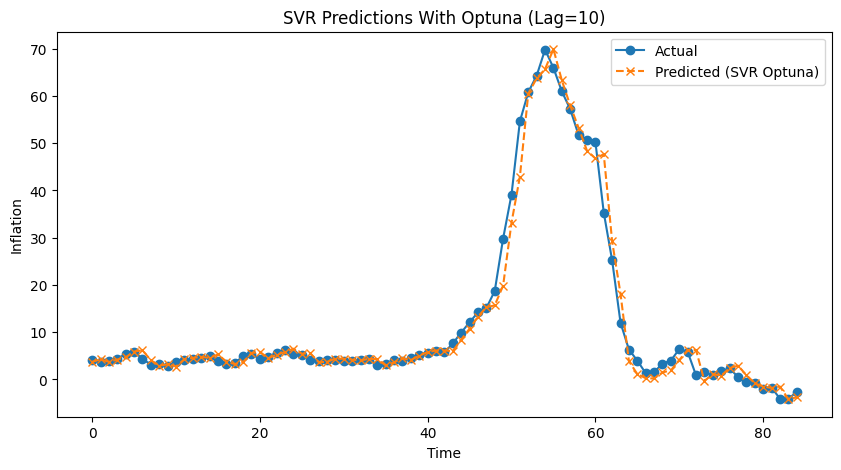

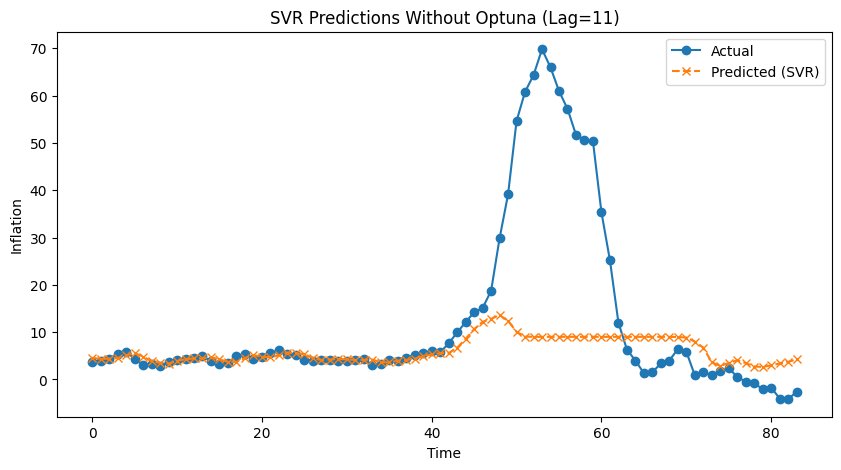

[I 2025-05-29 04:11:13,245] A new study created in memory with name: no-name-e6f11ab4-bfc1-42cb-b620-503e76fa96b7
[I 2025-05-29 04:11:13,712] Trial 0 finished with value: 1.2540715713142725 and parameters: {'C': 3.172471717637658, 'epsilon': 0.9612065938221751, 'kernel': 'linear'}. Best is trial 0 with value: 1.2540715713142725.
[I 2025-05-29 04:11:14,920] Trial 1 finished with value: 1.2140475256058036 and parameters: {'C': 5.994018768433113, 'epsilon': 0.3373690220165457, 'kernel': 'linear'}. Best is trial 1 with value: 1.2140475256058036.
[I 2025-05-29 04:11:14,962] Trial 2 finished with value: 45.661036220982204 and parameters: {'C': 7.030119632634736, 'epsilon': 0.7803921201563604, 'kernel': 'sigmoid'}. Best is trial 1 with value: 1.2140475256058036.
[I 2025-05-29 04:11:15,538] Trial 3 finished with value: 6.676643184083749 and parameters: {'C': 9.384444608199985, 'epsilon': 0.5799759999588984, 'kernel': 'poly'}. Best is trial 1 with value: 1.2140475256058036.
[I 2025-05-29 04:11:

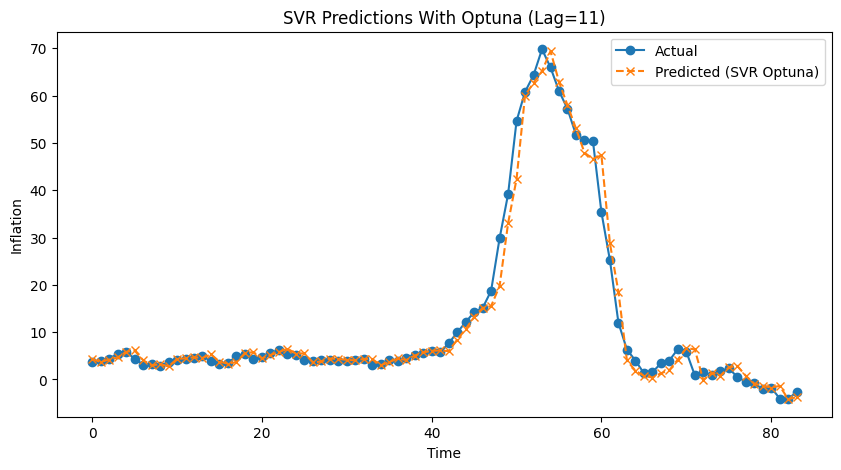

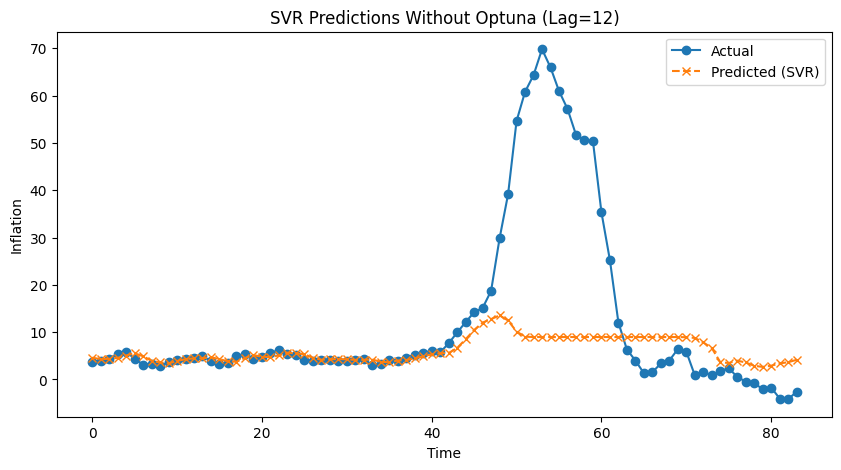

[I 2025-05-29 04:11:26,752] A new study created in memory with name: no-name-86531891-297b-423c-aca0-963a1f831e10
[I 2025-05-29 04:11:26,801] Trial 0 finished with value: 23.121864481743142 and parameters: {'C': 3.3149104090537587, 'epsilon': 0.2607925777734255, 'kernel': 'sigmoid'}. Best is trial 0 with value: 23.121864481743142.
[I 2025-05-29 04:11:26,847] Trial 1 finished with value: 3.6013307377741706 and parameters: {'C': 9.63487037976416, 'epsilon': 0.47537634406972773, 'kernel': 'rbf'}. Best is trial 1 with value: 3.6013307377741706.
[I 2025-05-29 04:11:26,888] Trial 2 finished with value: 3.6338566799723964 and parameters: {'C': 7.5705078467747535, 'epsilon': 0.13677973195710713, 'kernel': 'rbf'}. Best is trial 1 with value: 3.6013307377741706.
[I 2025-05-29 04:11:26,931] Trial 3 finished with value: 47.407356495006844 and parameters: {'C': 7.4379902475231265, 'epsilon': 0.46898613080730983, 'kernel': 'sigmoid'}. Best is trial 1 with value: 3.6013307377741706.
[I 2025-05-29 04:

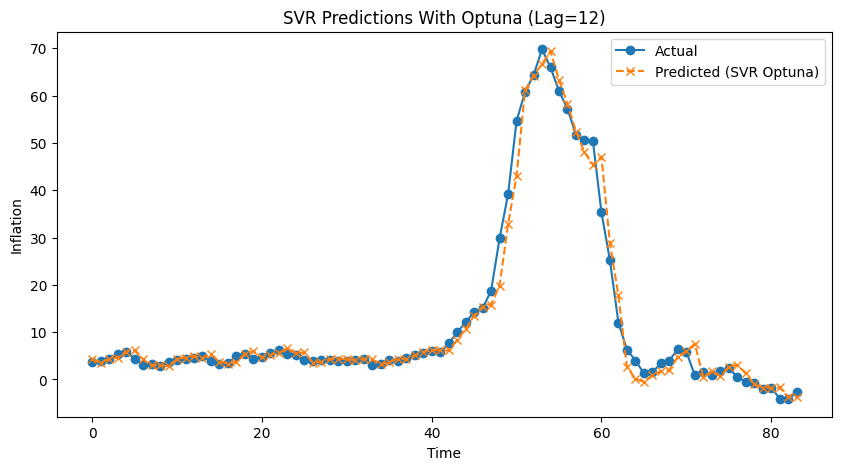

In [15]:
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# Initialize results list
results = []

# Loop through lag terms from 1 to 12
for max_lag in range(1, 13):
    df_lagged = df.copy()

    # Create lag features
    for lag in range(1, max_lag + 1):
        df_lagged[f'Inflation_Lag_{lag}'] = df_lagged['Inflation'].shift(lag)

    # Drop NaN values
    df_lagged = df_lagged.dropna()

    # Split into train and test sets
    train_size = int(0.7 * len(df_lagged))
    train, test = df_lagged[:train_size], df_lagged[train_size:]

    y_train, y_test = train['Inflation'], test['Inflation']
    X_train = train[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]
    X_test = test[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]

    # Train SVR model without Optuna
    svr_model = SVR()
    svr_model.fit(X_train, y_train)
    y_pred = svr_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2_baseline = r2_score(y_test, y_pred)

    results.append([max_lag, 'Without Optuna', rmse, mse, mae, mape, None, None, None, r2_baseline])

    # Plot actual vs. predicted values for the baseline model
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label="Actual", marker='o')
    plt.plot(y_pred, label="Predicted (SVR)", linestyle='dashed', marker='x')
    plt.title(f'SVR Predictions Without Optuna (Lag={max_lag})')
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Inflation")
    plt.show()

    # Define Optuna objective function
    def objective(trial):
        C = trial.suggest_float("C", 0.1, 10.0)
        epsilon = trial.suggest_float("epsilon", 0.01, 1.0)
        kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])

        svr_model = SVR(C=C, epsilon=epsilon, kernel=kernel)

        tscv = TimeSeriesSplit(n_splits=5)
        rmse_scores = []
        for train_idx, val_idx in tscv.split(X_train):
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

            svr_model.fit(X_train_fold, y_train_fold)
            y_pred_fold = svr_model.predict(X_val_fold)
            rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_pred_fold)))

        return np.mean(rmse_scores)

    # Run Optuna optimization
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=20)
    best_params = study.best_params

    # Train best model
    svr_best = SVR(**best_params)
    svr_best.fit(X_train, y_train)
    y_pred_optuna = svr_best.predict(X_test)

    # Evaluate Optuna model
    mse_optuna = mean_squared_error(y_test, y_pred_optuna)
    rmse_optuna = np.sqrt(mse_optuna)
    mae_optuna = mean_absolute_error(y_test, y_pred_optuna)
    mape_optuna = np.mean(np.abs((y_test - y_pred_optuna) / y_test)) * 100
    r2_optuna = r2_score(y_test, y_pred_optuna)

    results.append([
        max_lag, 'With Optuna', rmse_optuna, mse_optuna, mae_optuna, mape_optuna,
        best_params['C'], best_params['epsilon'], best_params['kernel'], r2_optuna
    ])

    # Plot actual vs. predicted values for Optuna-optimized model
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label="Actual", marker='o')
    plt.plot(y_pred_optuna, label="Predicted (SVR Optuna)", linestyle='dashed', marker='x')
    plt.title(f'SVR Predictions With Optuna (Lag={max_lag})')
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Inflation")
    plt.show()

# Save results to CSV
results_df = pd.DataFrame(results, columns=[
    'Lag Terms', 'Model Type', 'Test RMSE', 'Test MSE', 'Test MAE', 'Test MAPE',
    'Best C', 'Best Epsilon', 'Best Kernel', 'R²'
])
results_df.to_csv('svr_lag_results2.csv', index=False)


### Excel file saved as SVR_70_30_model_performance